## Exploring Global Coronavirus Cases

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import time
import math
import datetime

In [2]:
import random
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [4]:
us_medical_data= pd.read_csv('C:\\Users\\Admin\\Machine Learning\\07-12-2020.csv')

In [5]:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-13 04:43:16  32.3182  -86.9023   
1          Alaska             US  2020-07-13 04:43:16  61.3707 -152.4044   
2  American Samoa             US  2020-07-13 04:43:16 -14.2710 -170.1320   
3         Arizona             US  2020-07-13 04:43:16  33.7298 -111.4312   
4        Arkansas             US  2020-07-13 04:43:16  34.9697  -92.3731   

   Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  People_Tested  \
0      53587    1121    25783.0   26683.0     1    1092.901859       511506.0   
1       1479      17      615.0     847.0     2     202.174849       145475.0   
2          0       0        NaN       0.0    60       0.000000          816.0   
3     122467    2237    14829.0  105401.0     4    1682.535535       696172.0   
4      28367     321    21591.0    6455.0     5     939.988150       382402.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               6745.0        2.091925  84000001  USA  10432.117083   
1                  NaN        1.149425  84000002  USA  19885.994710   
2                  NaN             NaN        16  ASM   1466.544455   
3               5795.0        1.826615  84000004  USA   9564.487807   
4               1822.0        1.131597  84000005  USA  12671.532015   

   Hospitalization_Rate  
0             12.587008  
1                   NaN  
2                   NaN  
3              4.731887  
4              6.422956

In [6]:
us_medical_data.shape

(58, 18)

In [7]:
daily_case_data=pd.read_csv('C:\\Users\\Admin\\Machine Learning\\csse_daily.csv')

In [8]:
daily_case_data.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-07-13 04:43:04   
1  22001.0     Acadia       Louisiana             US  2020-07-13 04:43:04   
2  51001.0   Accomack        Virginia             US  2020-07-13 04:43:04   
3  16001.0        Ada           Idaho             US  2020-07-13 04:43:04   
4  19001.0      Adair            Iowa             US  2020-07-13 04:43:04   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707        153       1          0   152.0   
1  30.295065  -92.414197       1339      45          0  1294.0   
2  37.767072  -75.632346       1042      14          0  1028.0   
3  43.452658 -116.241552       4146      25          0  4121.0   
4  41.330756  -94.471059         17       0          0    17.0   

                    Combined_Key  Incidence_Rate  Case-Fatality_Ratio  
0  Abbeville, South Carolina, US      623.802340             0.653595  
1          Acadia, Louisiana, US     2158.111048             3.360717  
2         Accomack, Virginia, US     3224.408962             1.343570  
3                 Ada, Idaho, US      860.903637             0.602991  
4                Adair, Iowa, US      237.695749             0.000000

In [9]:
daily_case_data.shape

(3813, 14)

In [10]:
confirmed_df=pd.read_csv('C:\\Users\\Admin\\Machine Learning\\time_series_covid19_confirmed_global.csv')
deaths_df=pd.read_csv('C:\\Users\\Admin\\Machine Learning\\time_series_covid19_deaths_global.csv')
recoveries_df=pd.read_csv('C:\\Users\\Admin\\Machine Learning\\time_series_covid19_recovered_global.csv')

In [12]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0        0        0        0        0  ...   32672   32951   33190   33384   
1        0        0        0        0  ...    2819    2893    2964    3038   
2        0        0        0        0  ...   15500   15941   16404   16879   
3        0        0        0        0  ...     855     855     855     855   
4        0        0        0        0  ...     346     346     346     386   

   7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0   33594   33908    34194    34366    34451    34455  
1    3106    3188     3278     3371     3454     3571  
2   17348   17808    18242    18712    19195    19689  
3     855     855      855      855      855      858  
4     386     396      458      462      506      525  

[5 rows x 178 columns]

In [13]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0        0        0        0        0  ...     826     864     898     920   
1        0        0        0        0  ...      74      76      79      81   
2        0        0        0        0  ...     946     952     959     968   
3        0        0        0        0  ...      52      52      52      52   
4        0        0        0        0  ...      19      19      19      21   

   7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0     936     957      971      994     1010     1012  
1      83      83       85       89       93       95  
2     978     988      996     1004     1011     1018  
3      52      52       52       52       52       52  
4      21      22       23       23       26       26  

[5 rows x 178 columns]

In [14]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0        0        0        0        0  ...   19164   19366   20103   20179   
1        0        0        0        0  ...    1637    1657    1702    1744   
2        0        0        0        0  ...   11181   11492   11884   12094   
3        0        0        0        0  ...     800     800     800     800   
4        0        0        0        0  ...     108     108     108     117   

   7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0   20700   20847    20882    21135    21216    21254  
1    1791    1832     1875     1881     1946     2014  
2   12329   12637    13124    13124    13743    14019  
3     802     802      803      803      803      803  
4     117     117      117      118      118      118  

[5 rows x 178 columns]

### Get all the dates for the outbreak

In [22]:
cols=confirmed_df.keys()

In [23]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [24]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

### Getting daily increases and moving averages

In [25]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7


In [26]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

In [27]:
# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [28]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
world_active_avg = moving_average(total_active, window)


In [29]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

### Future forcasting

In [30]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

#Convert integer into datetime for better visualization

In [31]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [33]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[70:], world_cases[70:], test_size=0.12, shuffle=False)

#Model for predicting # of confirmed cases. 
#I am using support vector machine, bayesian ridge , and linear regression in this example.

In [34]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 118767.4606712982
MSE: 16594905834.352348


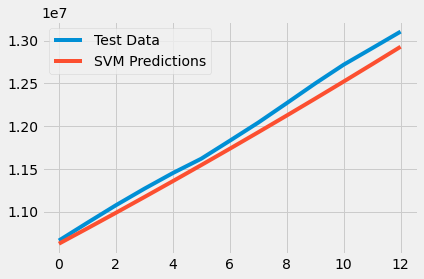

In [35]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [36]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [37]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 56604.51698035804
MSE: 3650497749.1533504


In [38]:
print(linear_model.coef_)

[[-5.02269108e+06  3.94955292e+04  1.83207122e+03 -2.54023975e+01
   1.38168132e-01 -2.31188505e-04]]


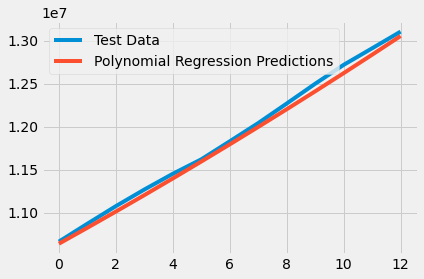

In [39]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [41]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.4s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [42]:
bayesian_search.best_params_

{'tol': 0.0001,
 'normalize': True,
 'lambda_2': 0.001,
 'lambda_1': 1e-05,
 'alpha_2': 0.001,
 'alpha_1': 0.001}

In [43]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 330046.45876221027
MSE: 120170934653.69937


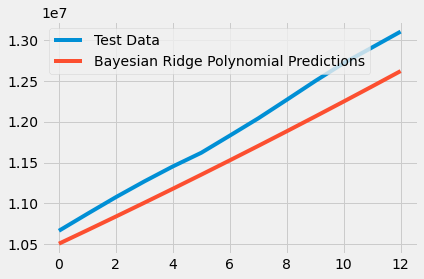

In [44]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

#### Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate.

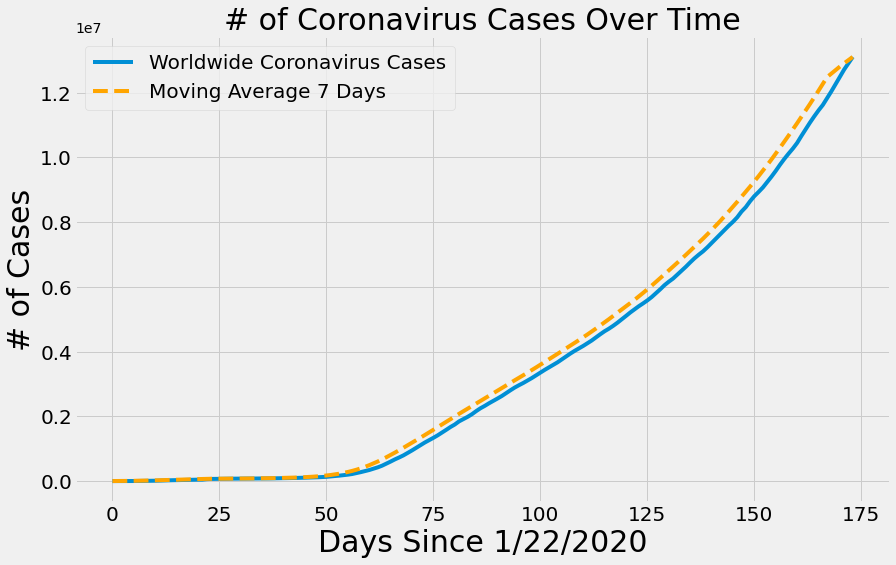

In [48]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

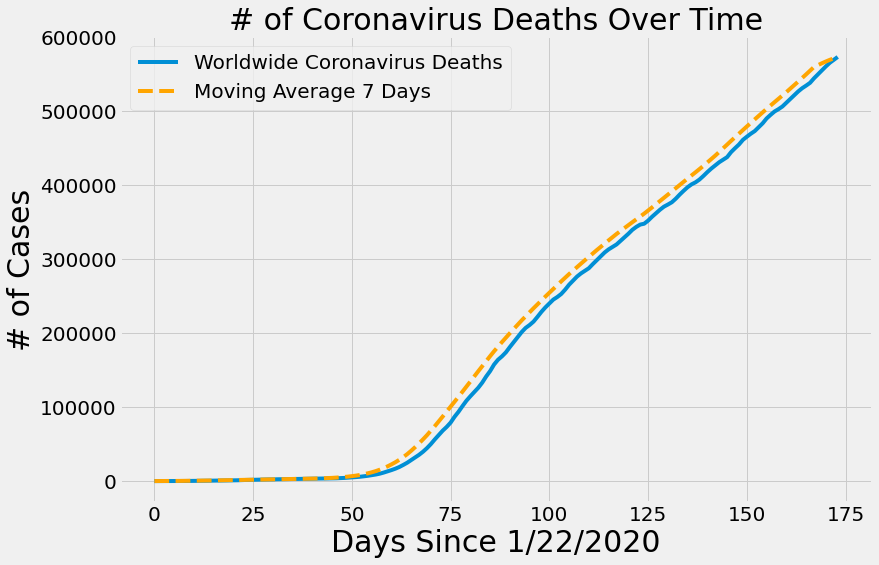

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

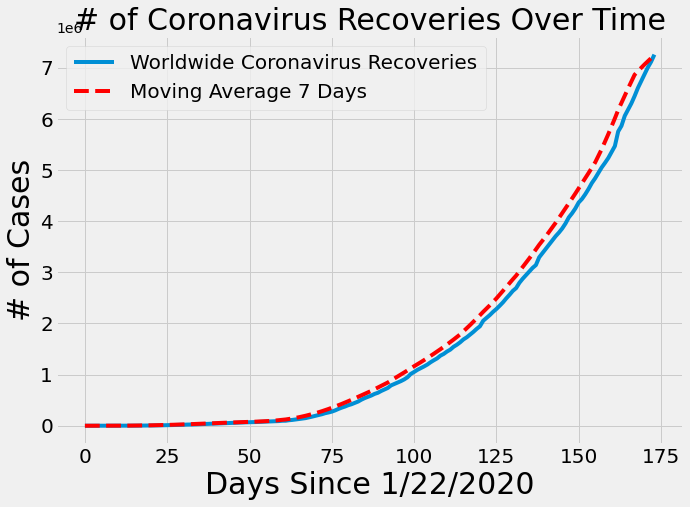

In [55]:
plt.figure(figsize=(10, 7))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='red')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

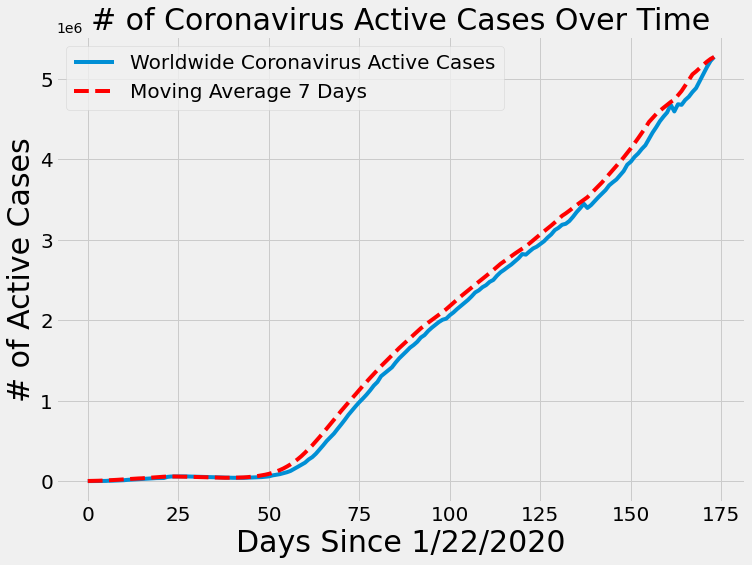

In [54]:
plt.figure(figsize=(11, 8))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='red')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

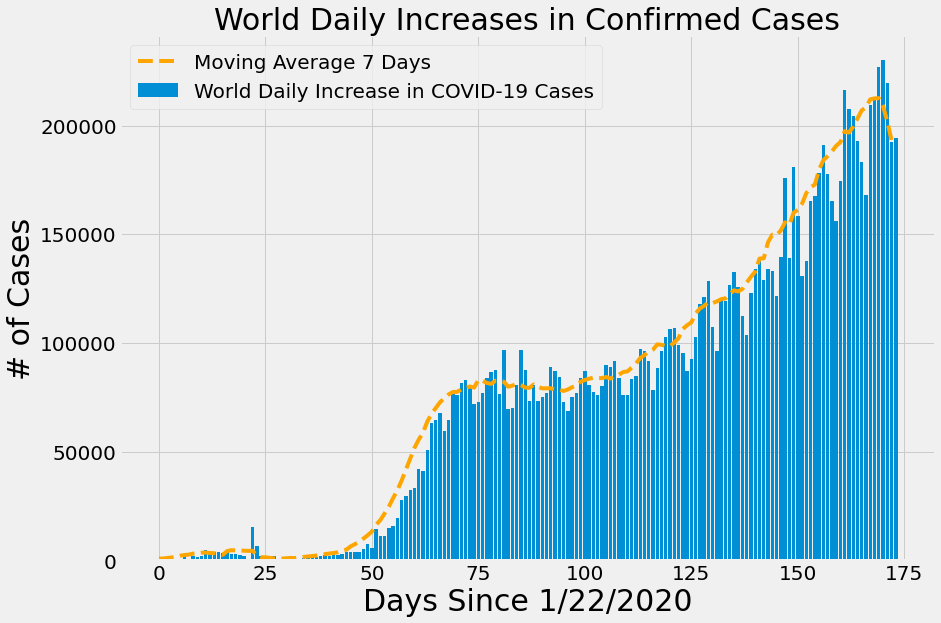

In [58]:
plt.figure(figsize=(13, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

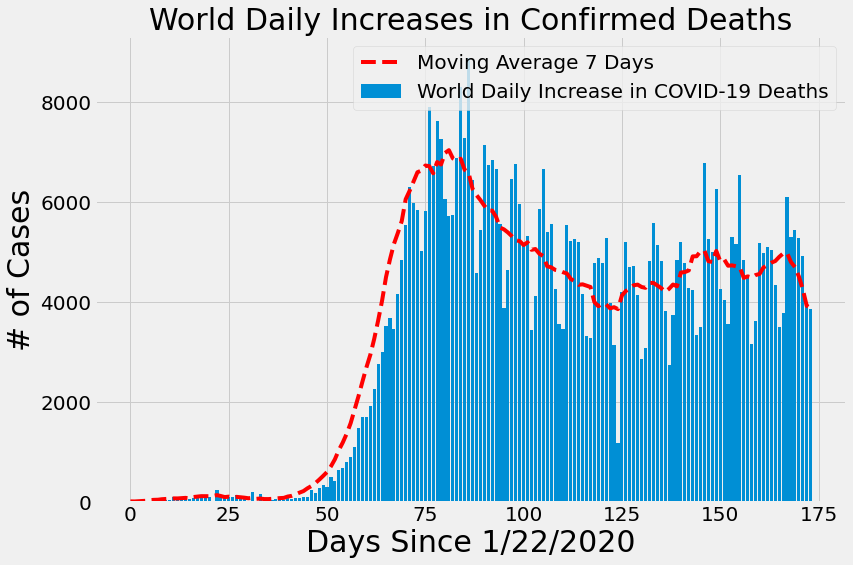

In [57]:
plt.figure(figsize=(12, 8))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='red', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

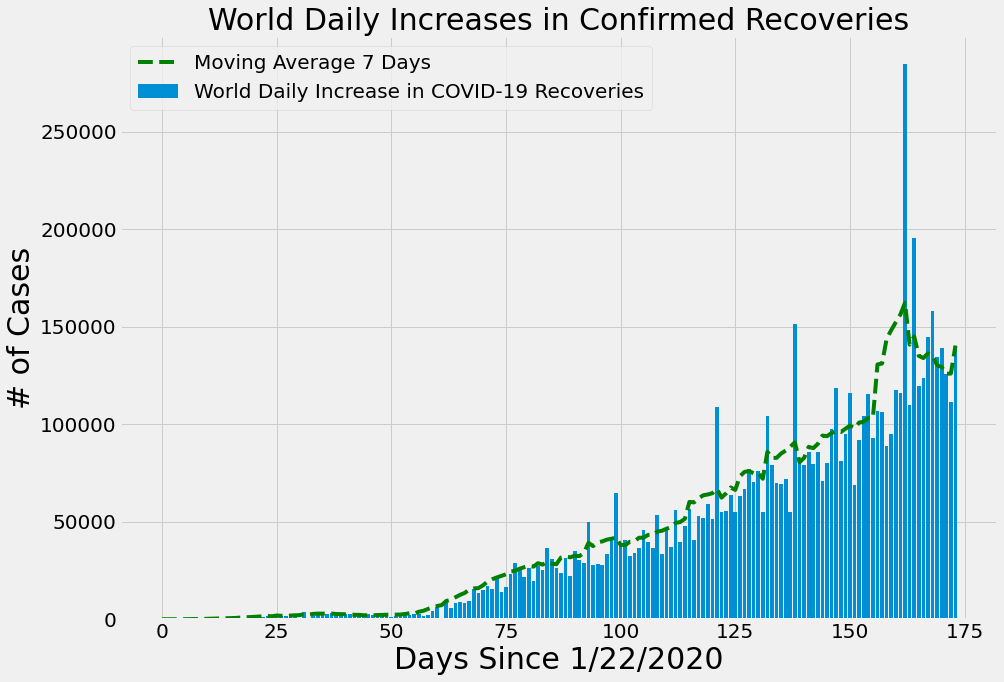

In [59]:
plt.figure(figsize=(14, 10))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='green', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

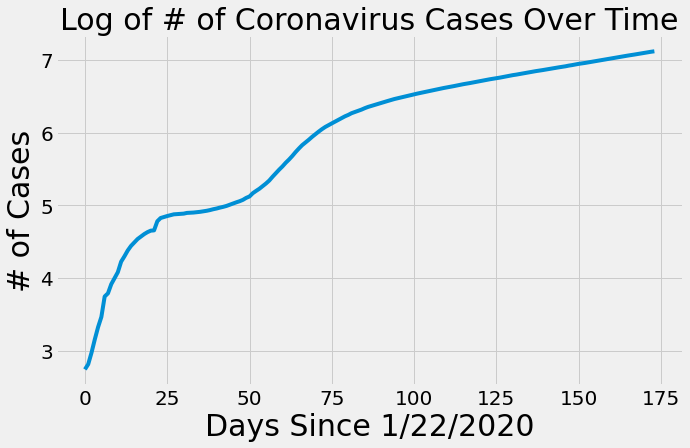

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

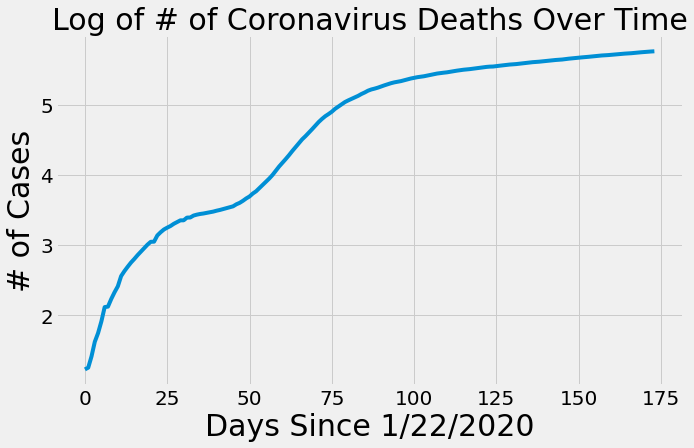

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

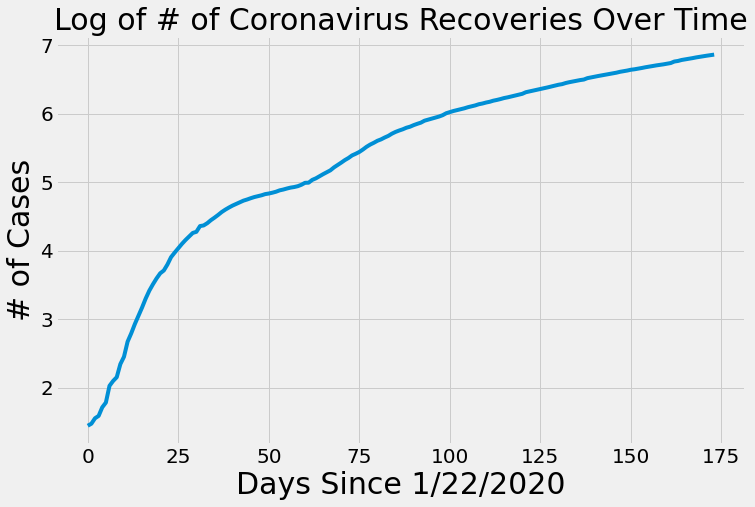

In [63]:
plt.figure(figsize=(11, 7))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Country Specific Graphs

In [69]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='orange', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='green', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)

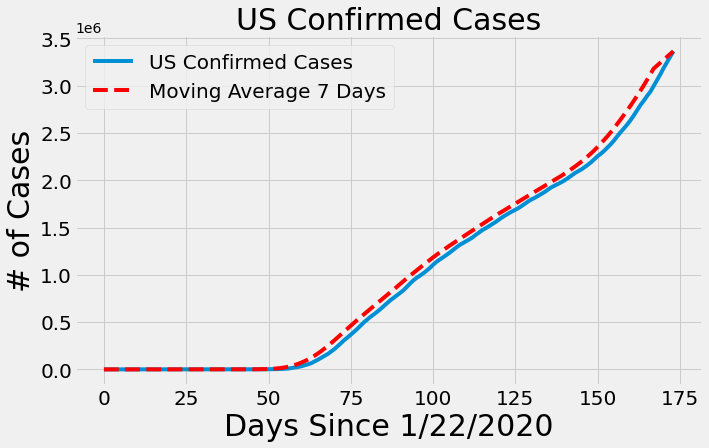

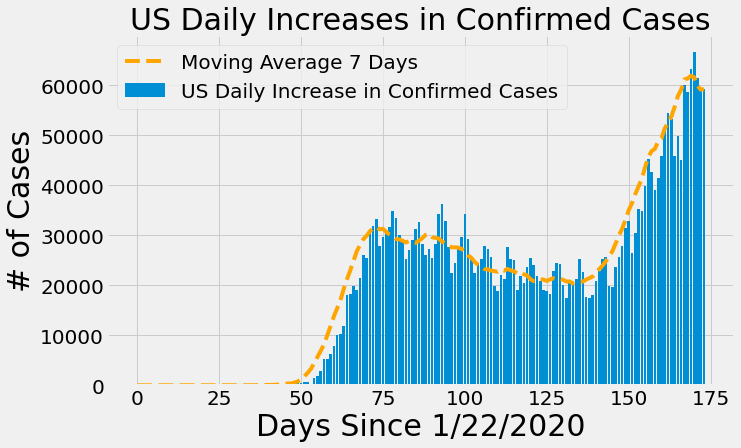

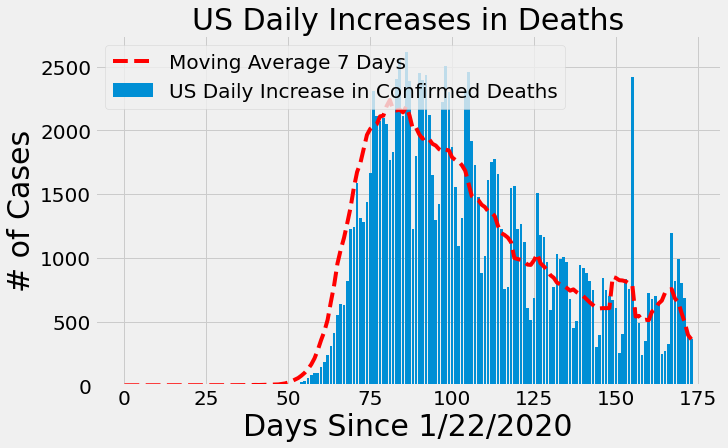

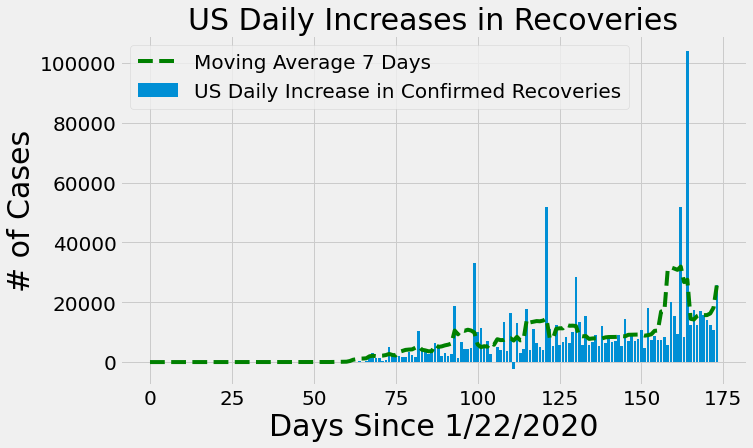

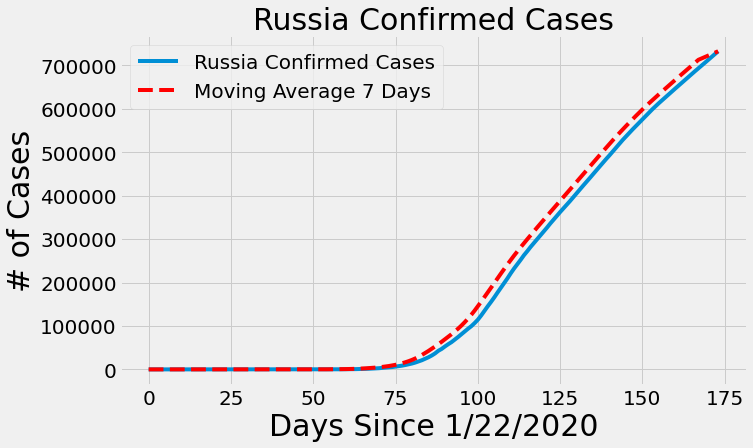

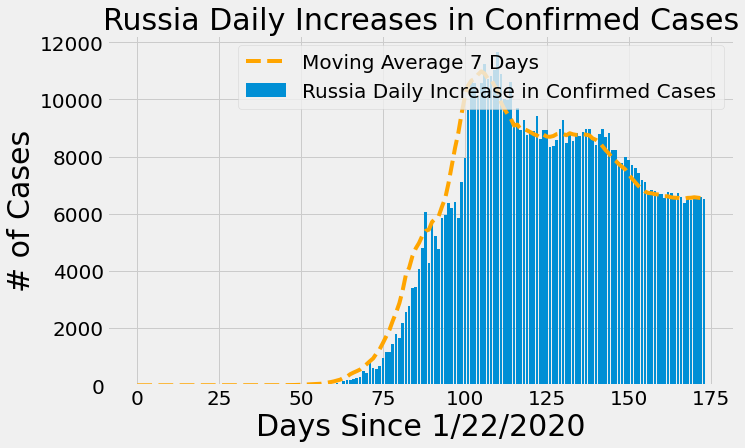

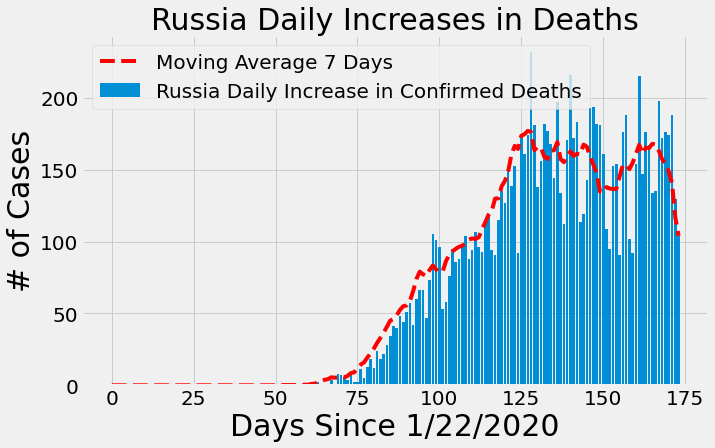

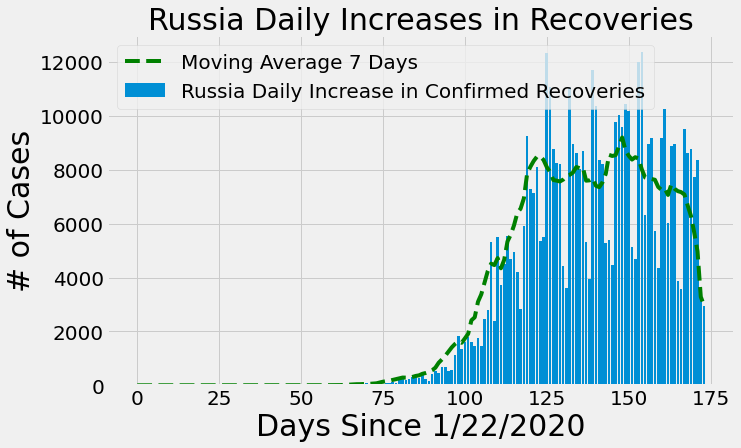

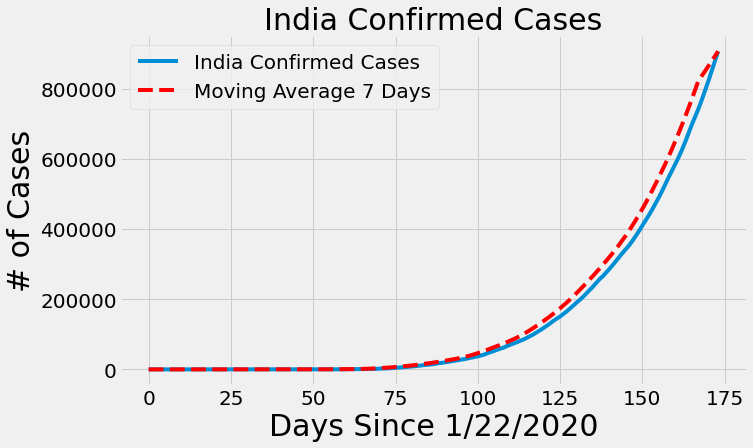

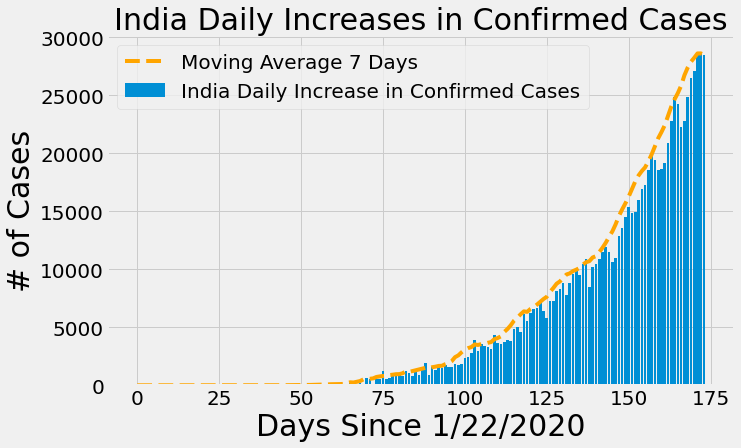

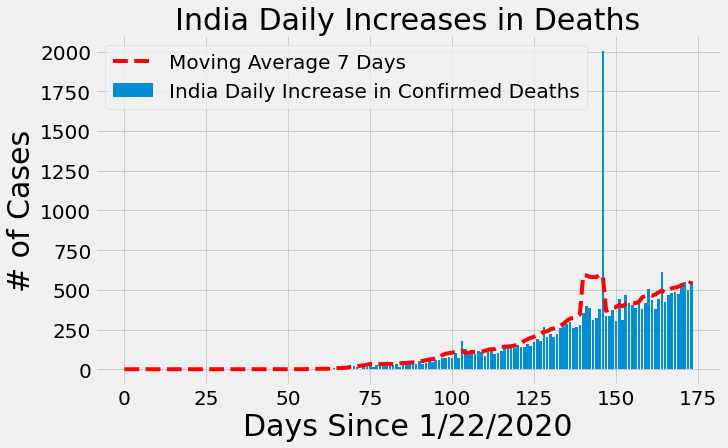

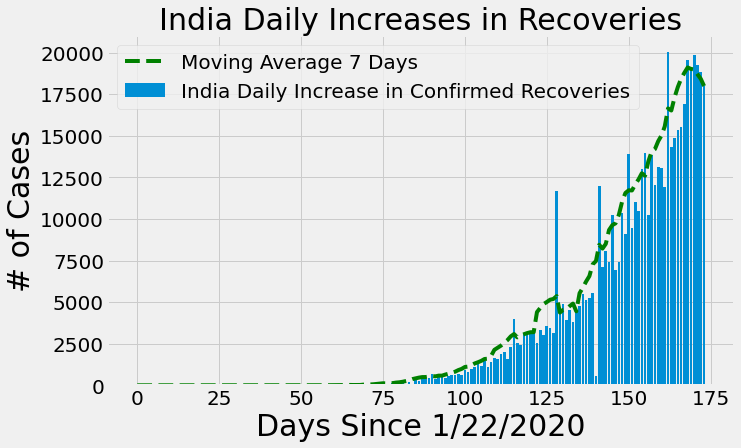

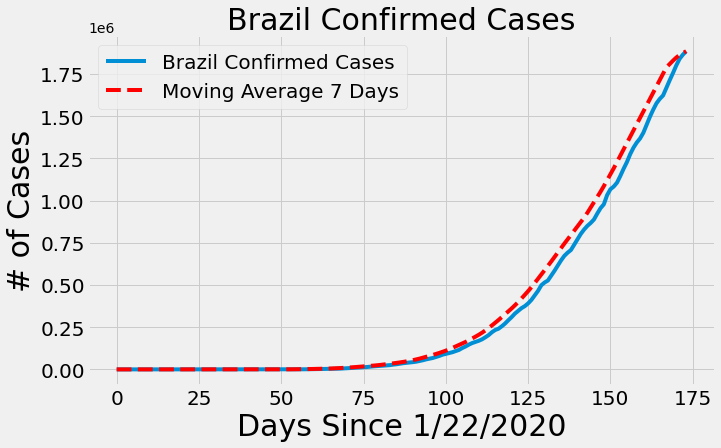

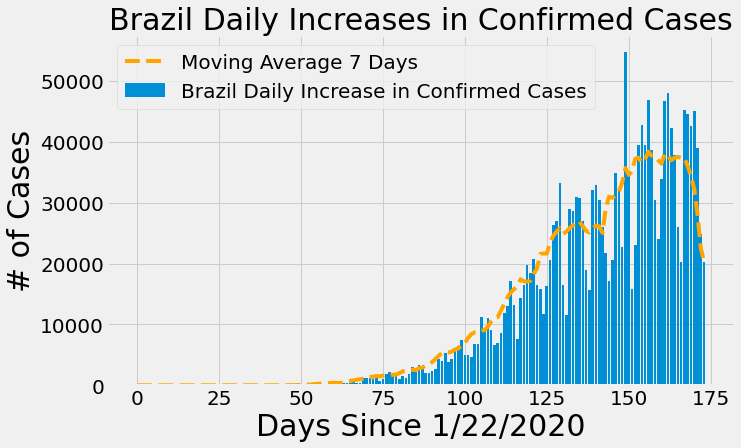

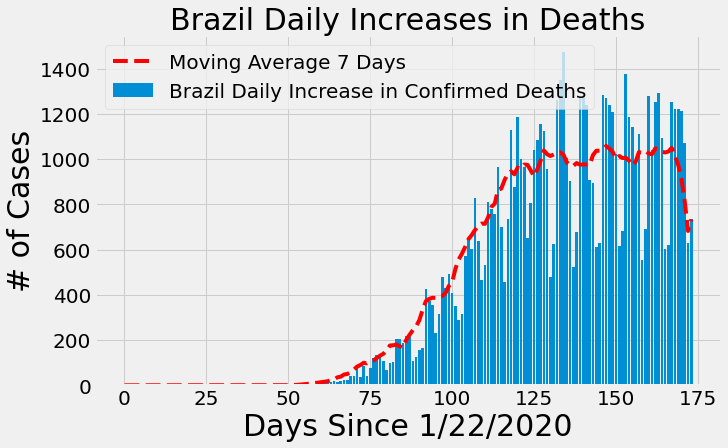

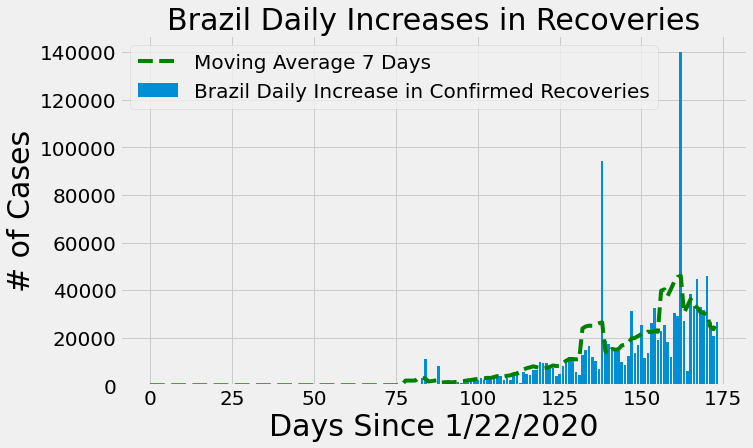

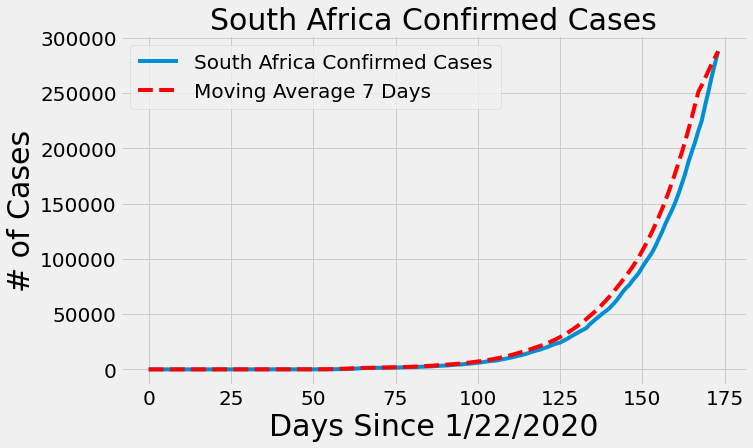

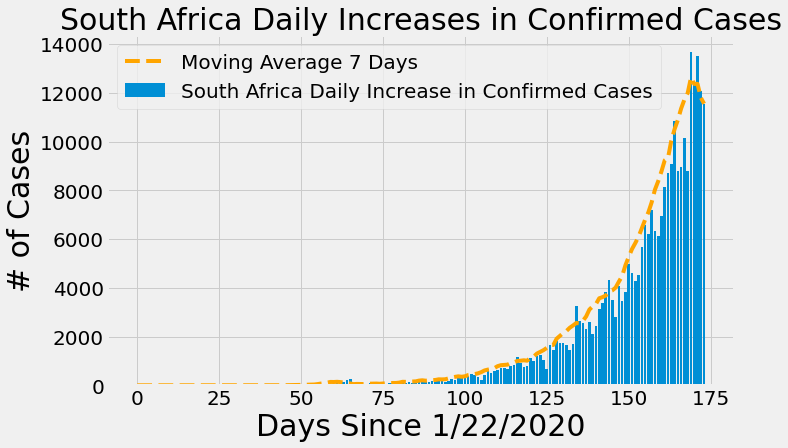

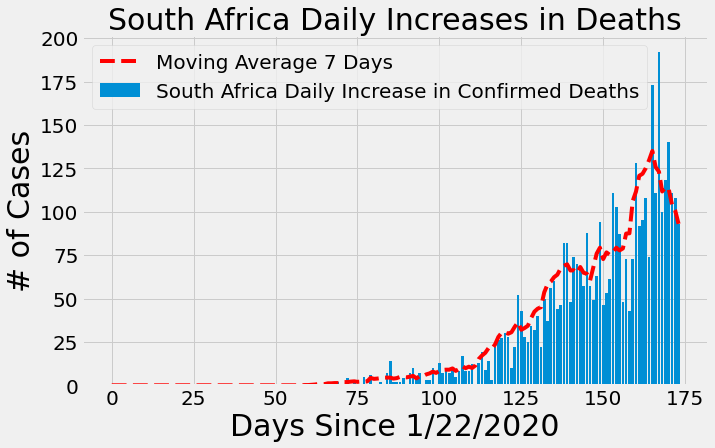

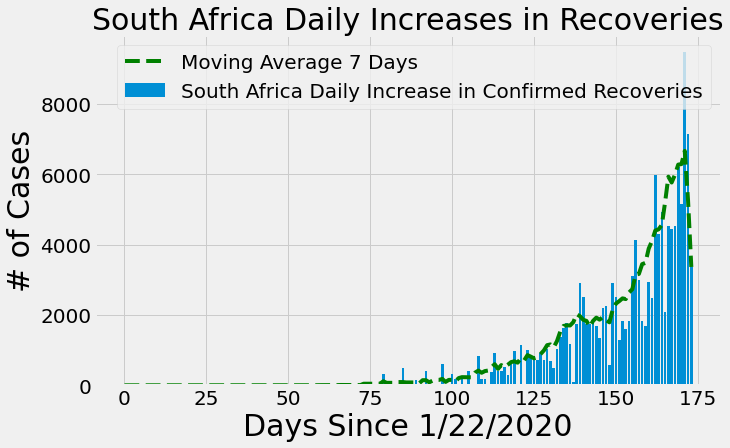

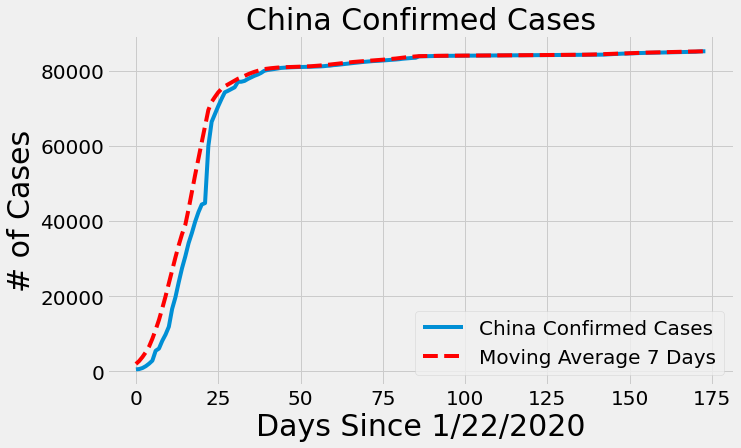

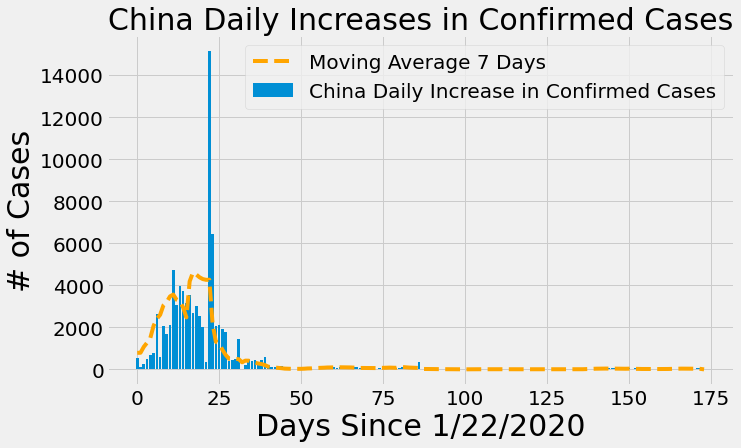

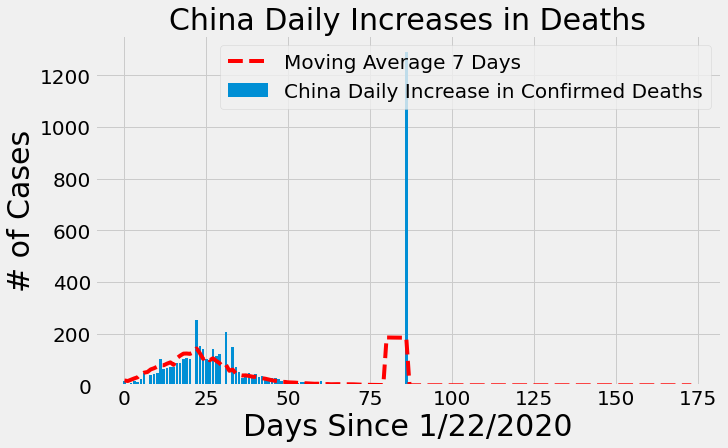

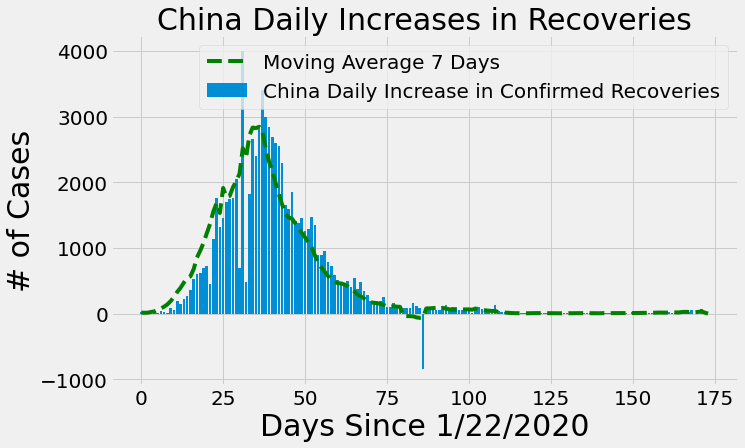

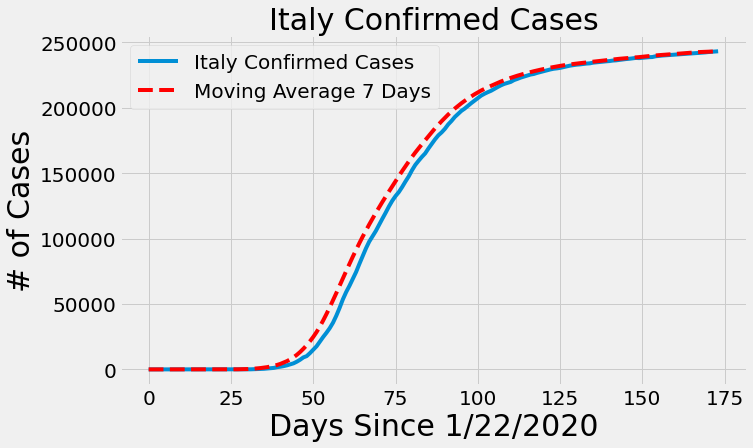

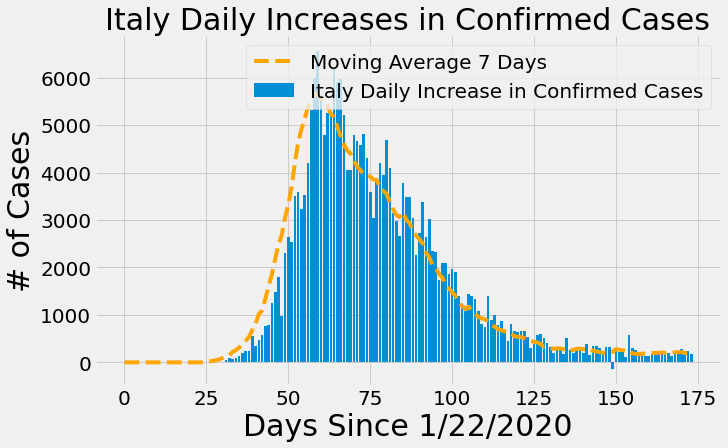

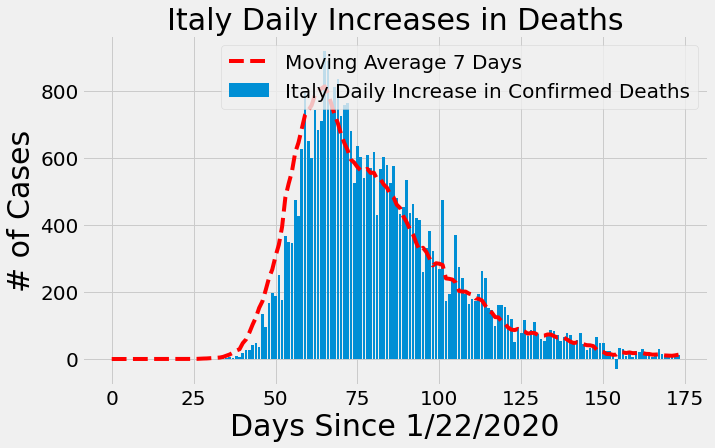

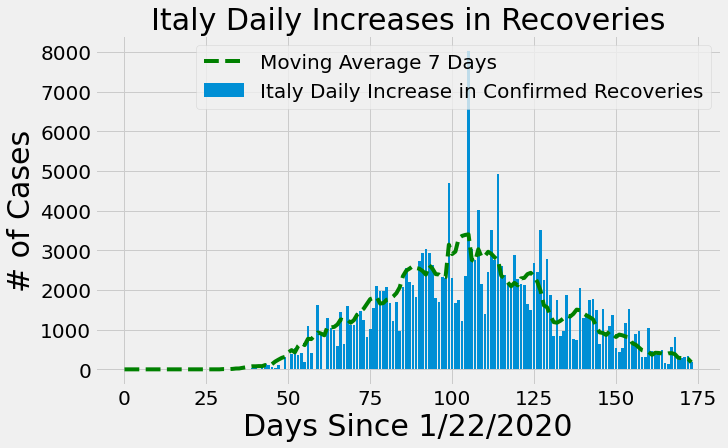

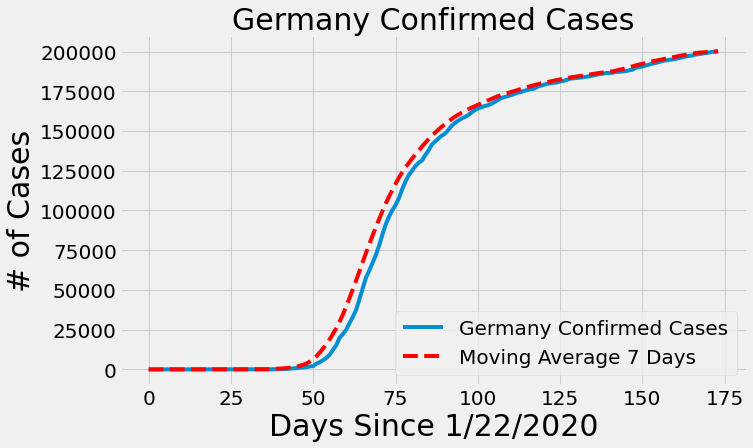

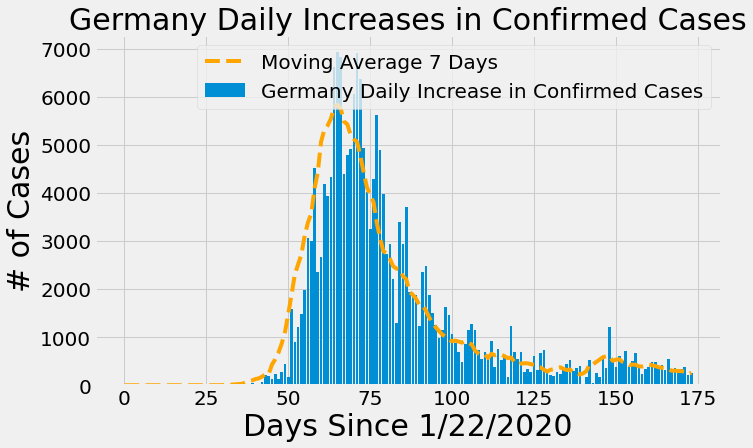

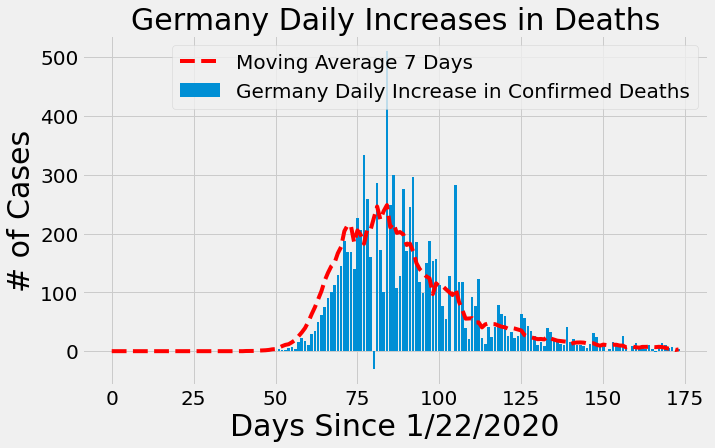

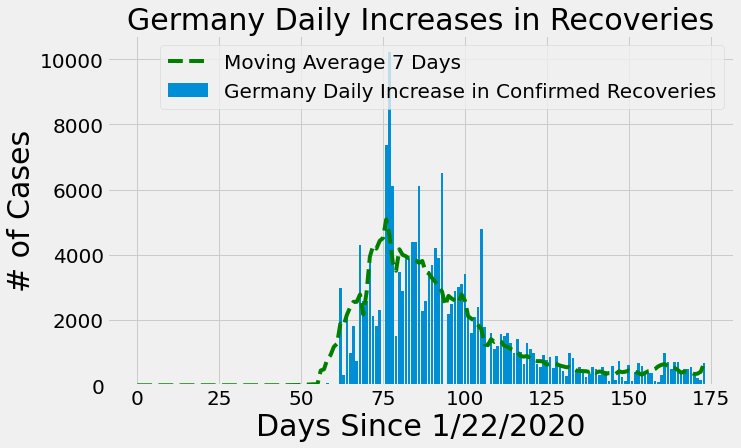

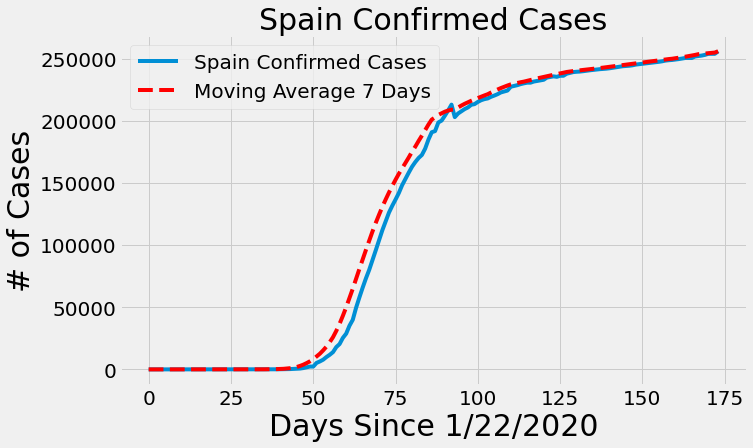

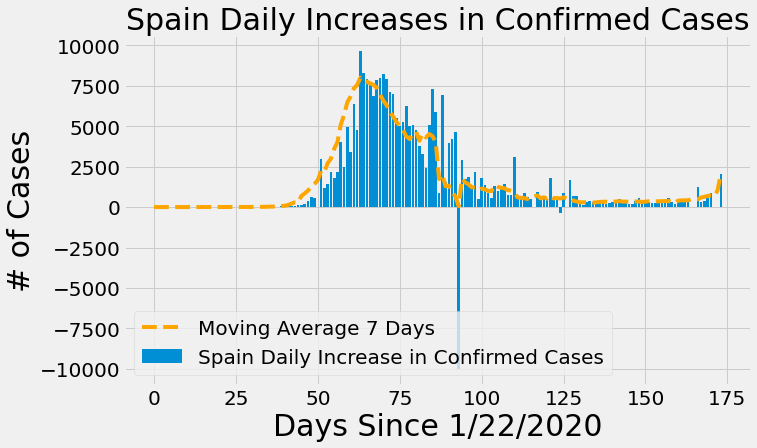

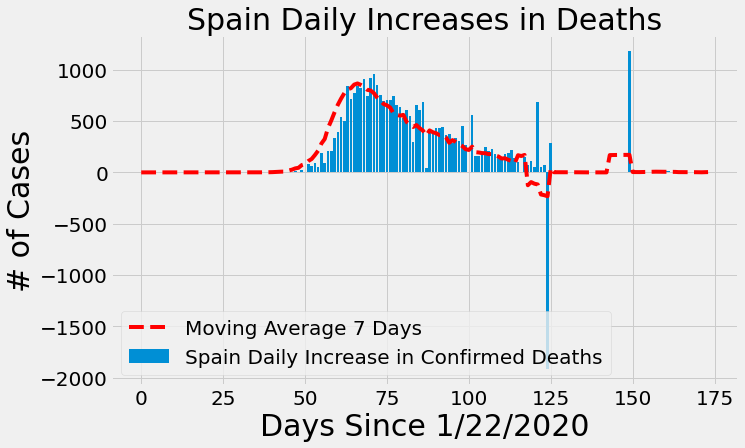

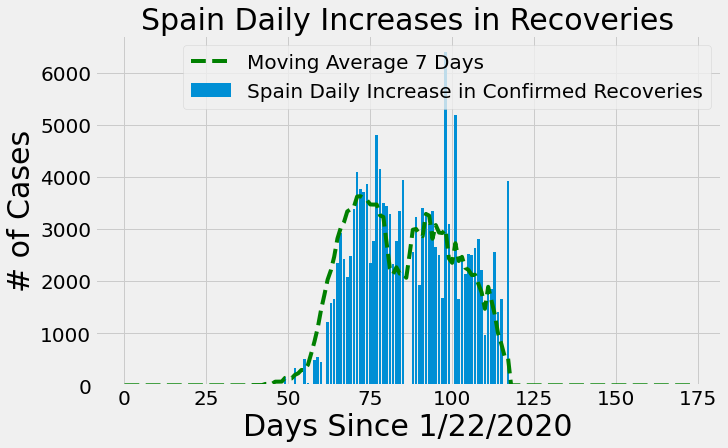

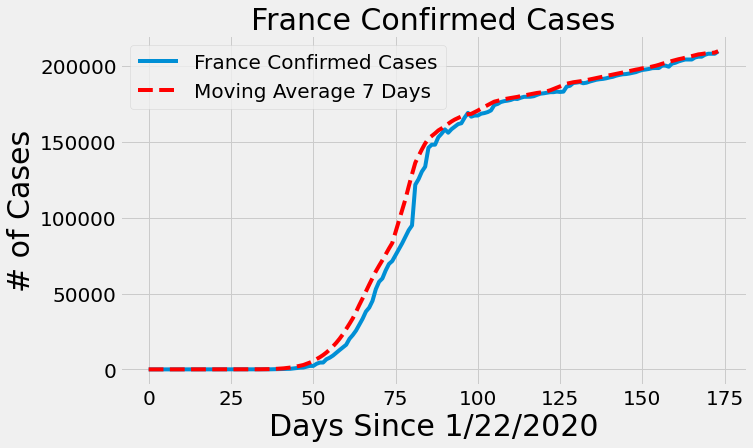

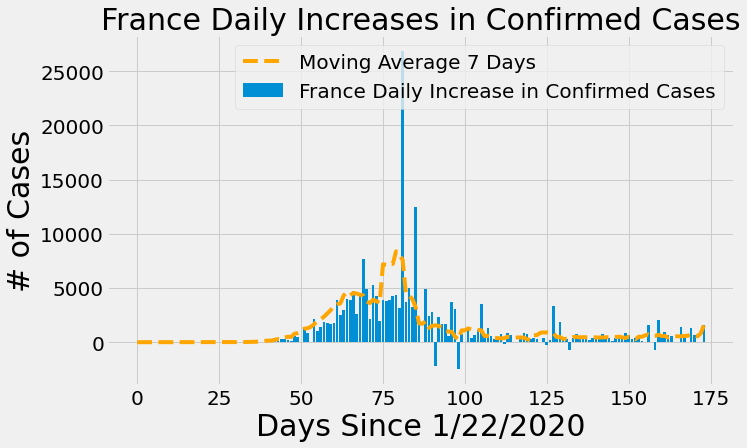

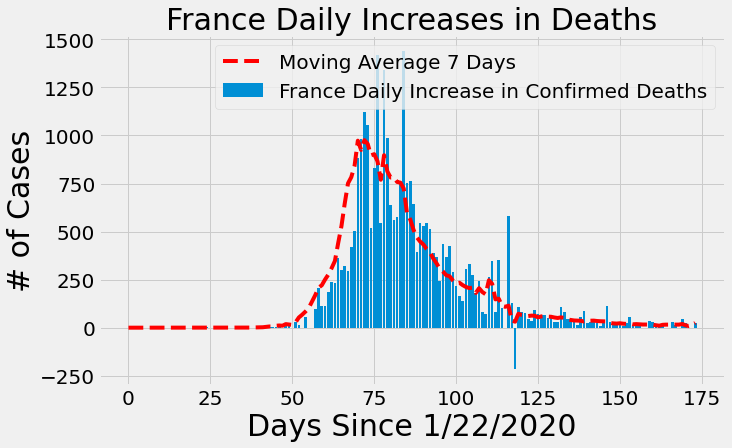

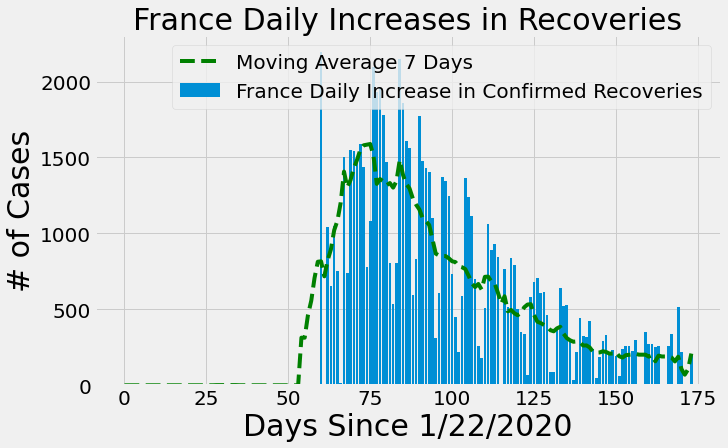

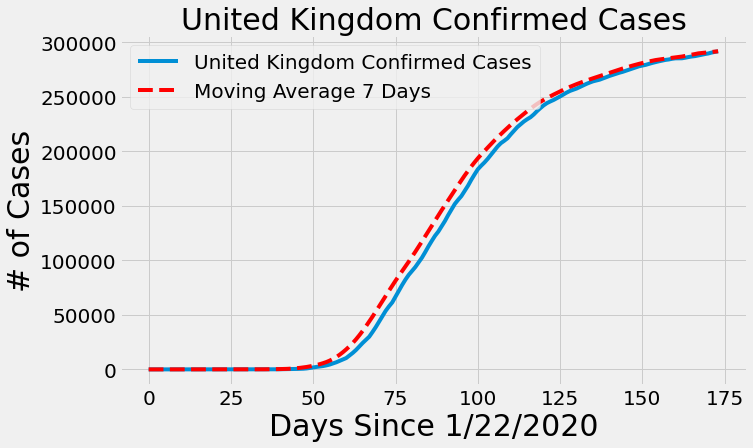

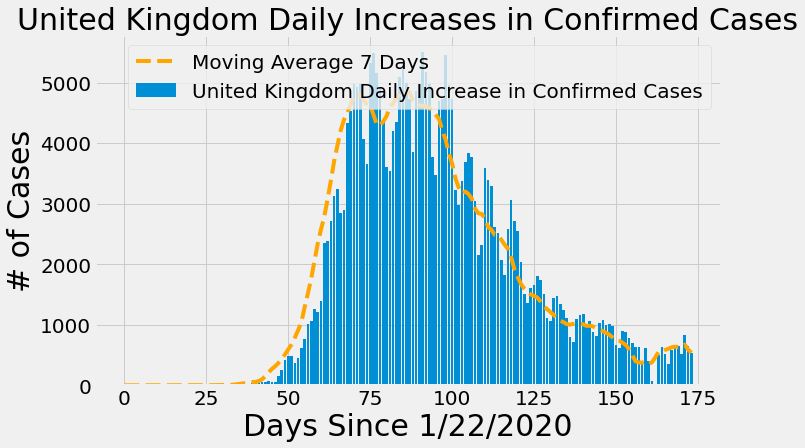

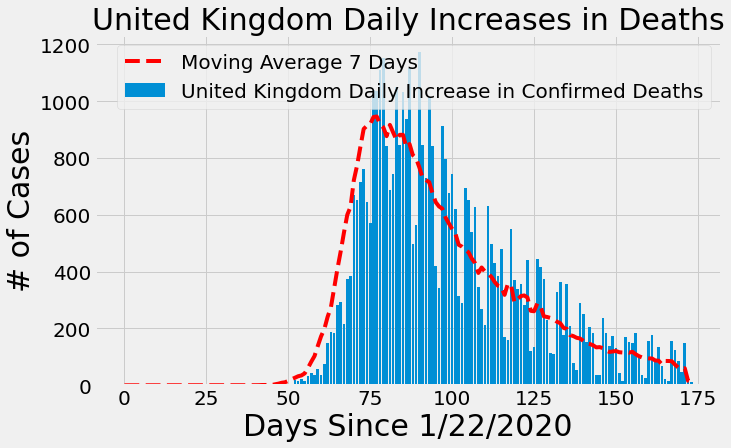

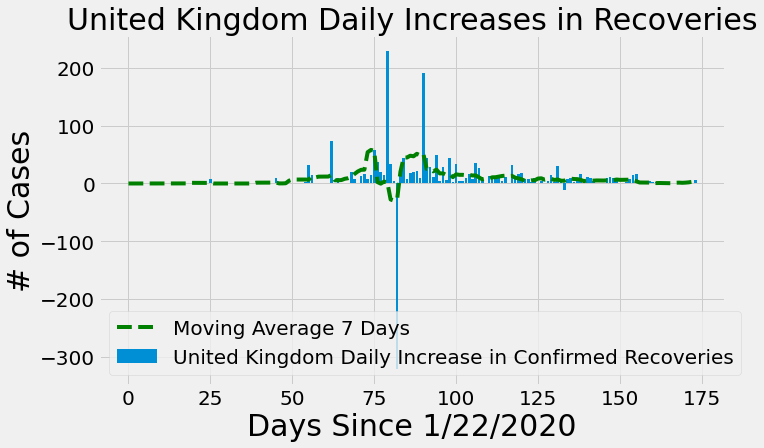

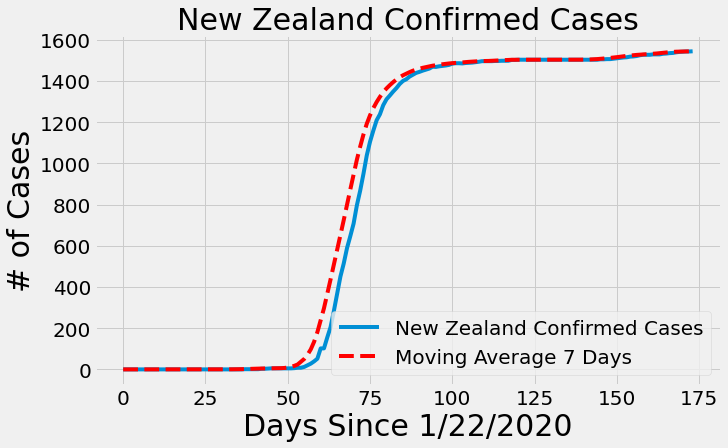

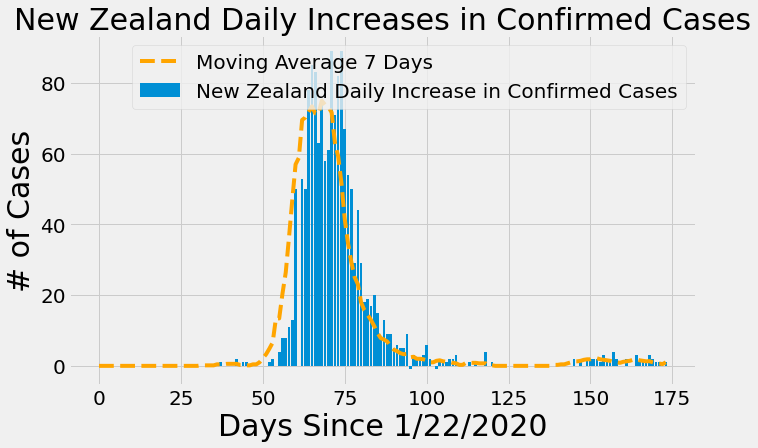

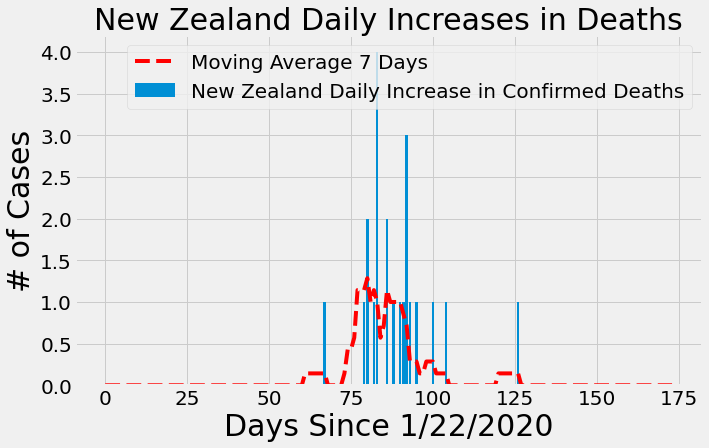

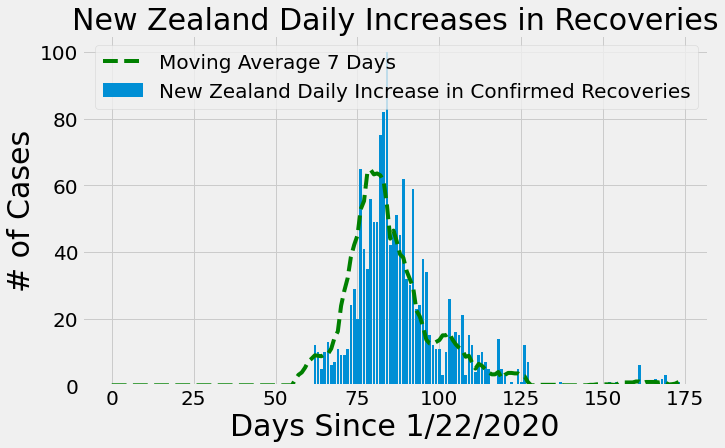

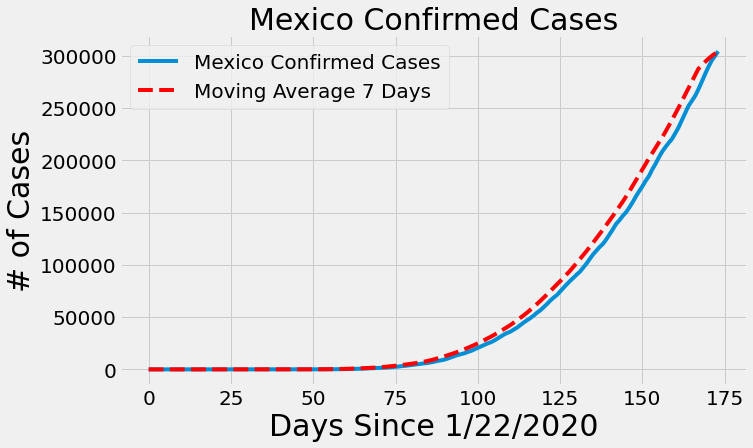

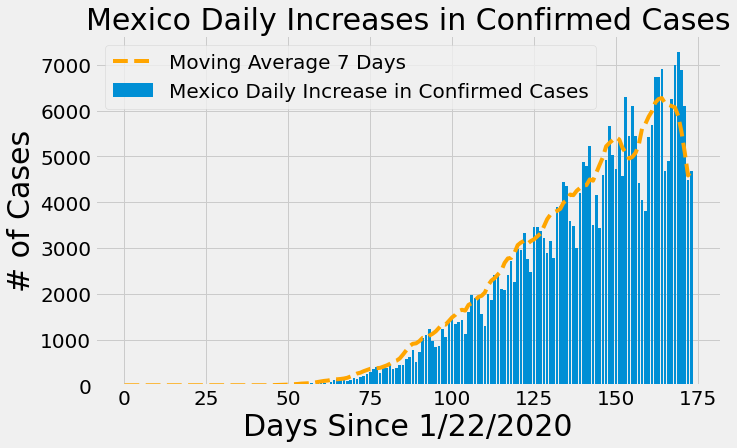

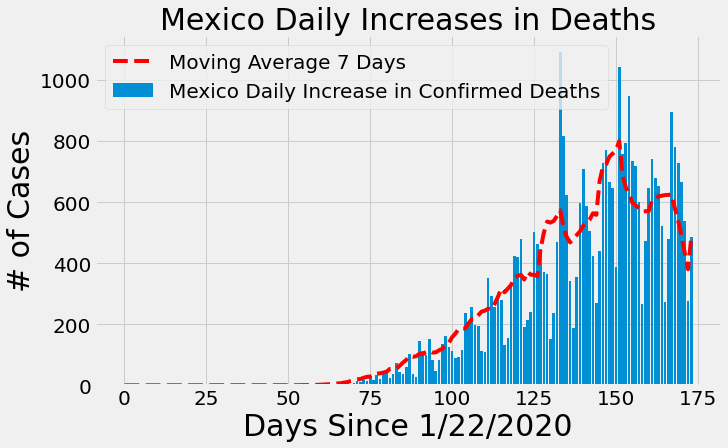

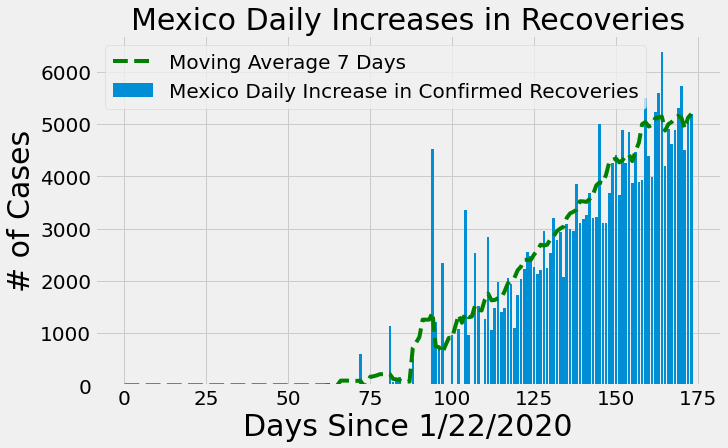

In [71]:
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'New Zealand', 'Mexico'] 

for country in countries:
    country_visualizations(country)

### Country Comparision

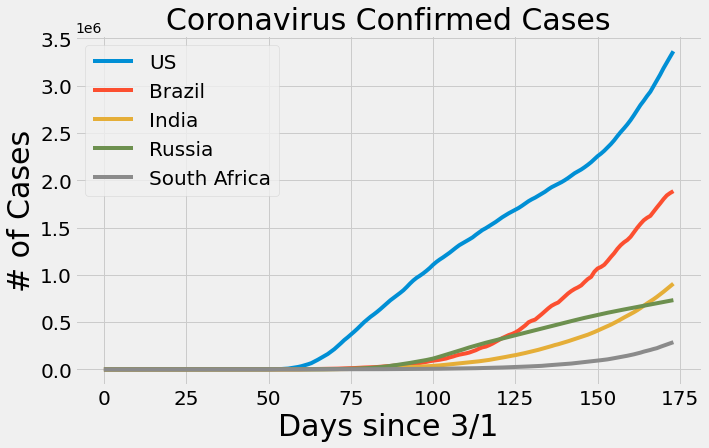

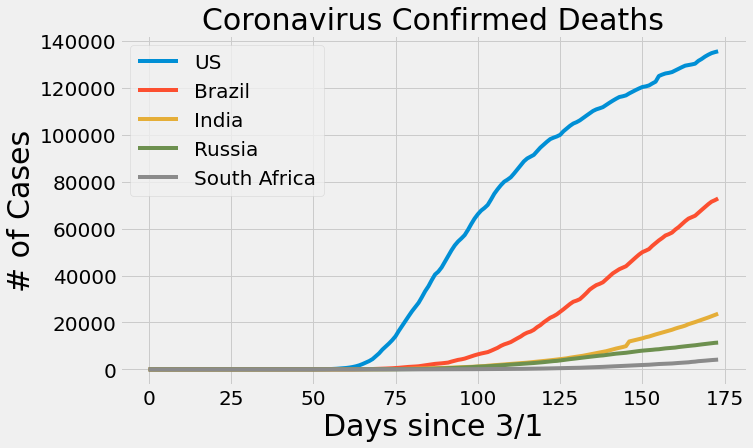

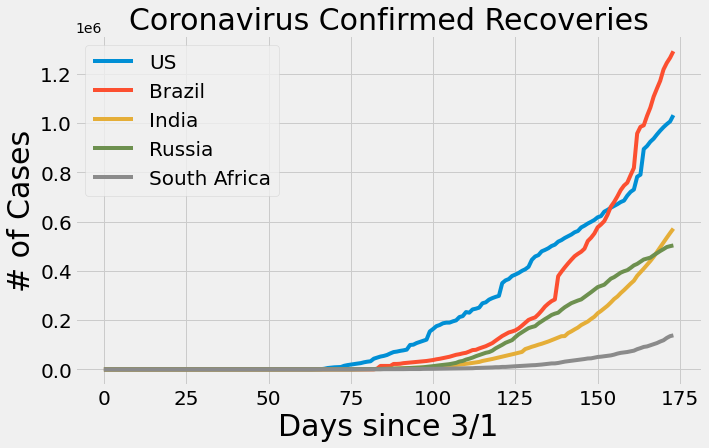

In [73]:
compare_countries = ['US', 'Brazil', 'India', 'Russia', 'South Africa'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(3):
    plt.figure(figsize=(10, 6))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

### Predictions for confirmed coronavirus cases worldwide

In [74]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(10, 7))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

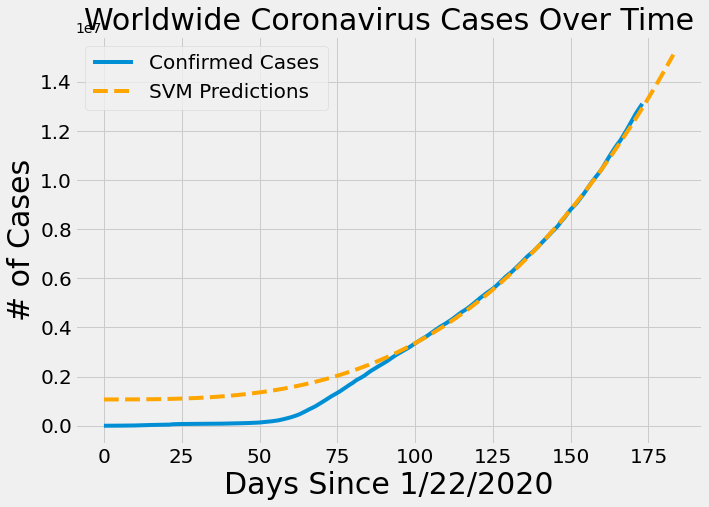

In [76]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'orange')

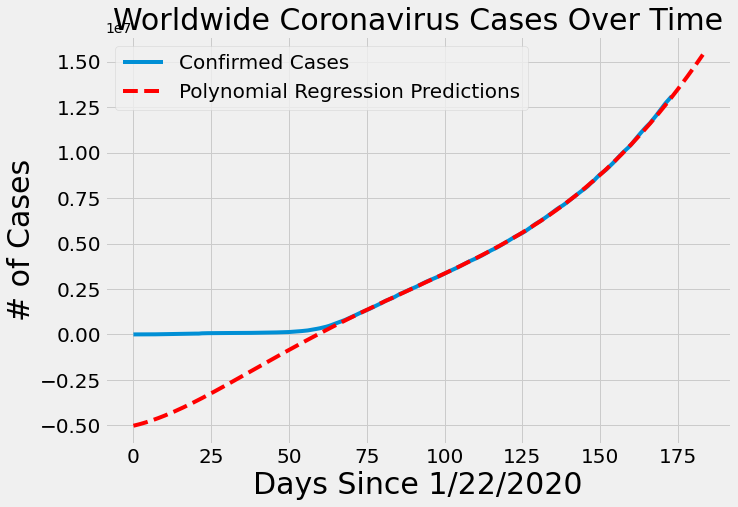

In [77]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

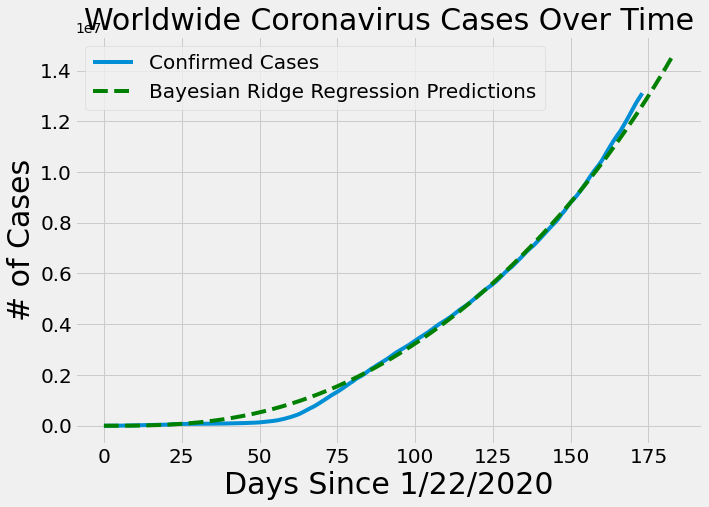

In [78]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

#Future predictions using SVM

In [80]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted no. of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

Date  SVM Predicted no. of Confirmed Cases Worldwide
0  07/14/2020                                      13134565.0
1  07/15/2020                                      13343775.0
2  07/16/2020                                      13555390.0
3  07/17/2020                                      13769424.0
4  07/18/2020                                      13985889.0
5  07/19/2020                                      14204801.0
6  07/20/2020                                      14426172.0
7  07/21/2020                                      14650016.0
8  07/22/2020                                      14876348.0
9  07/23/2020                                      15105181.0

#Future predictions using polynomial regression

In [81]:
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted no. of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df

Date  Polynomial Predicted no. of Confirmed Cases Worldwide
0  07/14/2020                                         13273448.0    
1  07/15/2020                                         13496661.0    
2  07/16/2020                                         13722863.0    
3  07/17/2020                                         13952054.0    
4  07/18/2020                                         14184236.0    
5  07/19/2020                                         14419408.0    
6  07/20/2020                                         14657568.0    
7  07/21/2020                                         14898711.0    
8  07/22/2020                                         15142831.0    
9  07/23/2020                                         15389922.0

#Future predictions using Bayesian Ridge

In [82]:
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted no of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df

Date  Bayesian Ridge Predicted no of Confirmed Cases Worldwide
0  07/14/2020                                         12810746.0       
1  07/15/2020                                         13002915.0       
2  07/16/2020                                         13197377.0       
3  07/17/2020                                         13394170.0       
4  07/18/2020                                         13593330.0       
5  07/19/2020                                         13794895.0       
6  07/20/2020                                         13998906.0       
7  07/21/2020                                         14205401.0       
8  07/22/2020                                         14414422.0       
9  07/23/2020                                         14626009.0

#Death Rate (worldwide).

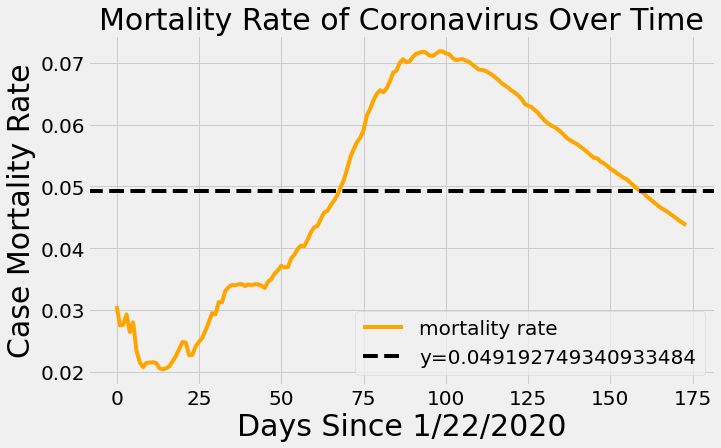

In [84]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#Recovery Rate (worldwide).

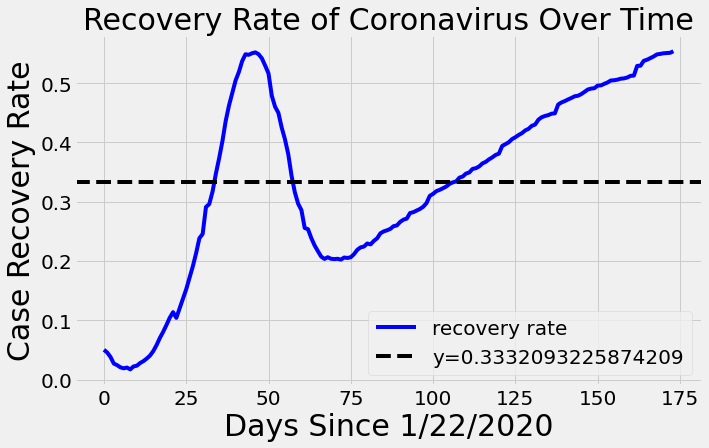

In [85]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#Graphing deaths against recoveries.

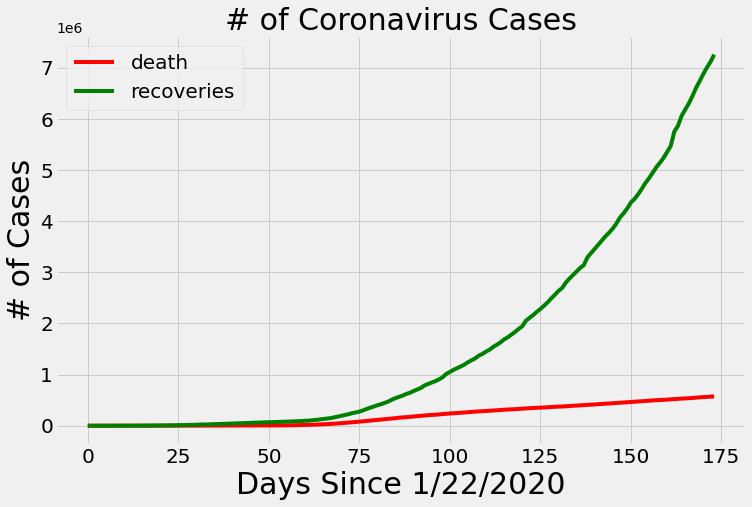

In [86]:
plt.figure(figsize=(11, 7))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#Plotting the number of deaths against the number of recoveries.

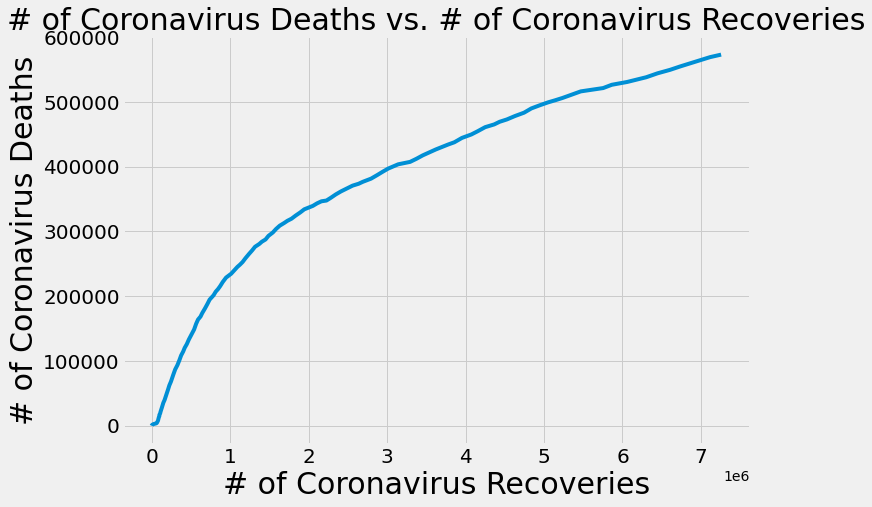

In [87]:
plt.figure(figsize=(10, 7))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#Getting information about countries/regions that have confirmed coronavirus cases.

In [91]:
unique_countries =  list(daily_case_data['Country_Region'].unique())

In [95]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 
no_cases = []

for i in unique_countries:
    cases = daily_case_data[daily_case_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = daily_case_data[daily_case_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(daily_case_data[daily_case_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(daily_case_data[daily_case_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

### Data Table

In [96]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

#Getting the latest information about provinces/states that have confirmed coronavirus cases.

In [98]:
unique_provinces =  list(daily_case_data['Province_State'].unique())

In [99]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = daily_case_data[daily_case_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = daily_case_data[daily_case_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(daily_case_data[daily_case_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(daily_case_data[daily_case_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(daily_case_data[daily_case_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

#number of cases per province/state/city top 100.

In [100]:
province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': province_confirmed_cases[:100],
                          'Number of Deaths': province_death_cases[:province_limit], 'Number of Recoveries' : province_recovery_cases[:province_limit],
                          'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region

province_df.style.background_gradient(cmap='Oranges')

### Bar Chart Visualizations for COVID-19.

In [101]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

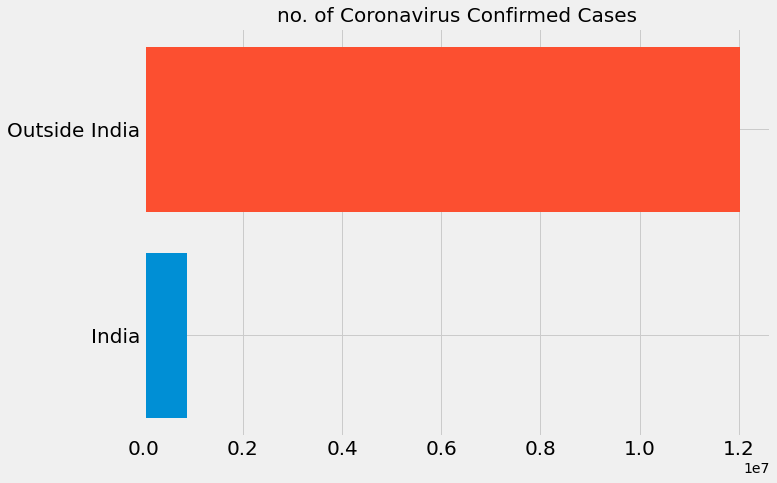

In [107]:
India_confirmed = daily_case_data[daily_case_data['Country_Region']=='India']['Confirmed'].sum()
outside_india_confirmed = np.sum(country_confirmed_cases) - India_confirmed
plt.figure(figsize=(10, 7))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_india_confirmed)
plt.title('no. of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

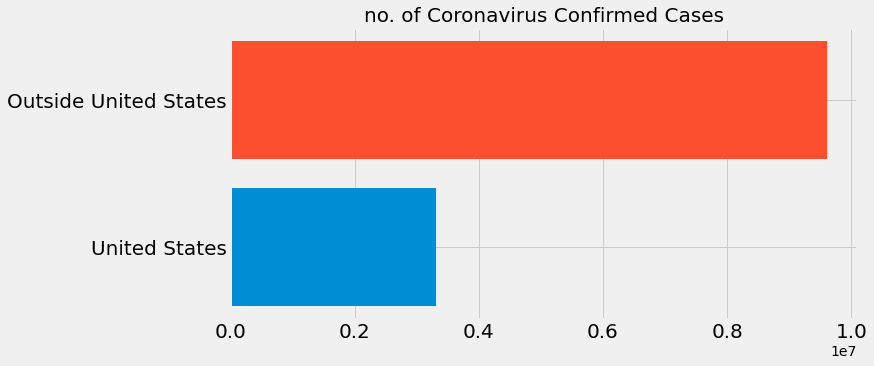

In [108]:
us_confirmed = daily_case_data[daily_case_data['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = np.sum(country_confirmed_cases) - us_confirmed
plt.figure(figsize=(10, 5))
plt.barh('United States', us_confirmed)
plt.barh('Outside United States', outside_us_confirmed)
plt.title('no. of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [109]:
print('Outside United States {} cases:'.format(outside_us_confirmed))
print('United States {} cases'.format(us_confirmed))
print('Total: {} cases'.format(us_confirmed+outside_us_confirmed))

Outside United States 9605415 cases:
United States 3304942 cases
Total: 12910357 cases


In [110]:
# Only show 15 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

#Visual Representations (bar charts and pie charts)

In [112]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(10, 6))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(13, 10))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

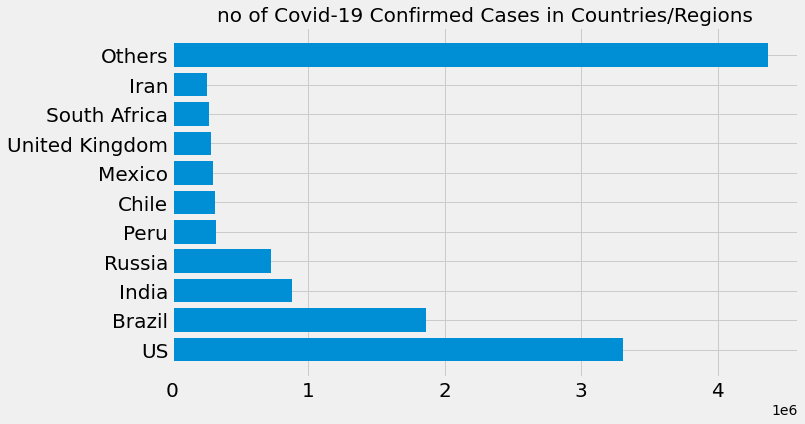

In [113]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'no of Covid-19 Confirmed Cases in Countries/Regions')

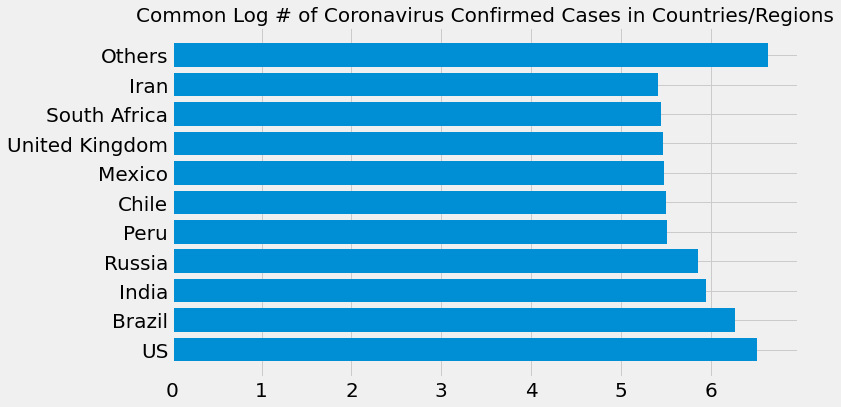

In [114]:
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plot_bar_graphs(visual_unique_countries, log_country_confirmed_cases, 'Common Log # of Coronavirus Confirmed Cases in Countries/Regions')

In [115]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

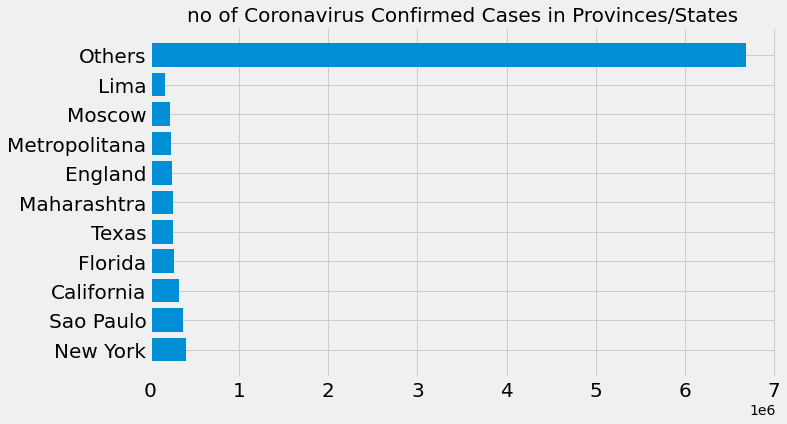

In [116]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'no of Coronavirus Confirmed Cases in Provinces/States')

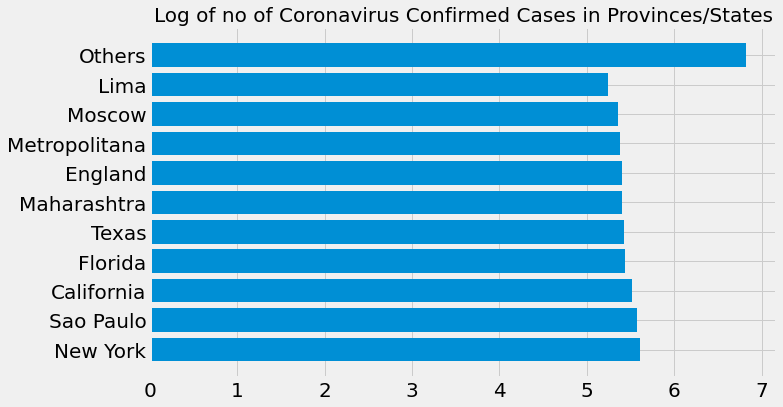

In [117]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plot_bar_graphs(visual_unique_provinces, log_province_confirmed_cases, 'Log of no of Coronavirus Confirmed Cases in Provinces/States')

### Pie Chart Visualizations for COVID-19.

In [120]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['bisque', 'darkorange', 'darkgoldenrod', 'darkolivegreen', 'purple',
        'mediumvioletred', 'lightsteelblue', 'lemonchiffon', 'slateblue', 'darkseagreen', 'lightcoral']
    plt.figure(figsize=(15,10))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

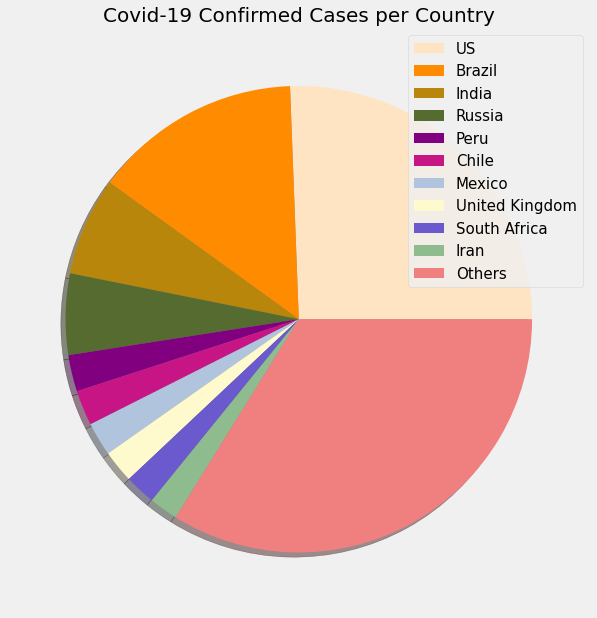

In [121]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

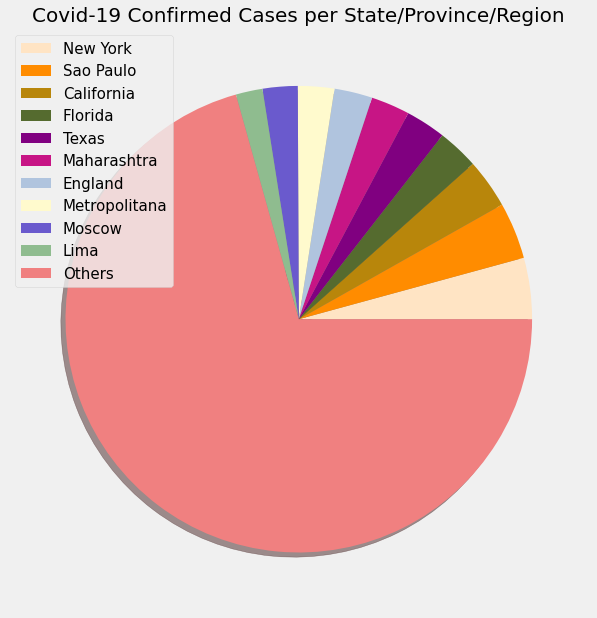

In [122]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [125]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(daily_case_data[daily_case_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = daily_case_data[daily_case_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = daily_case_data[daily_case_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

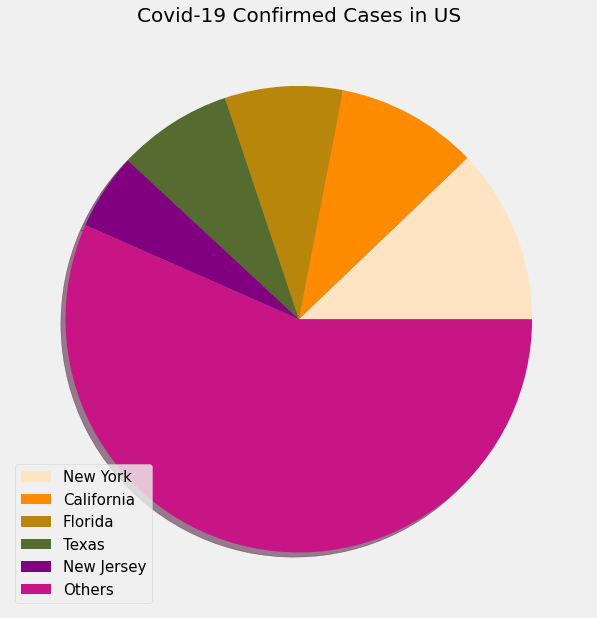

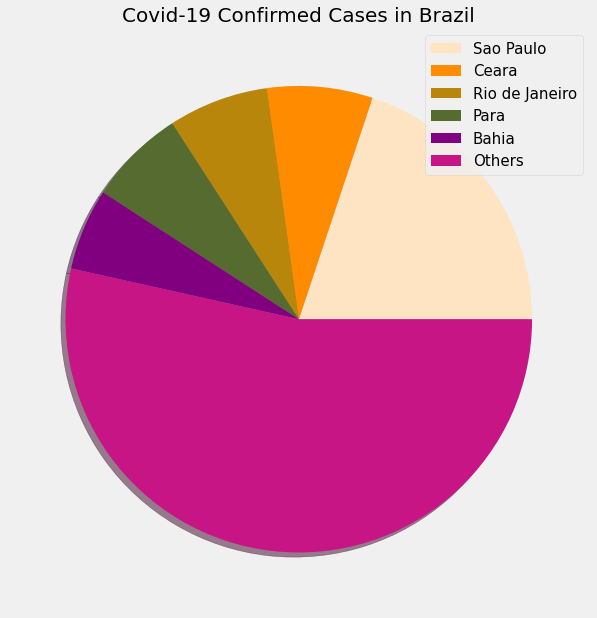

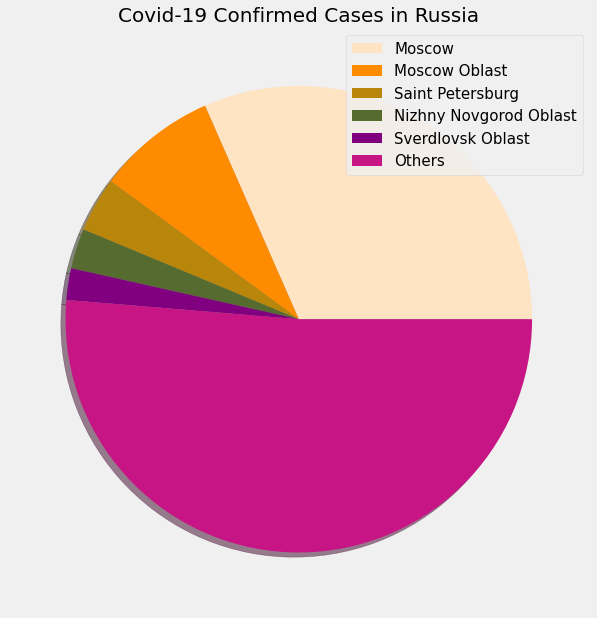

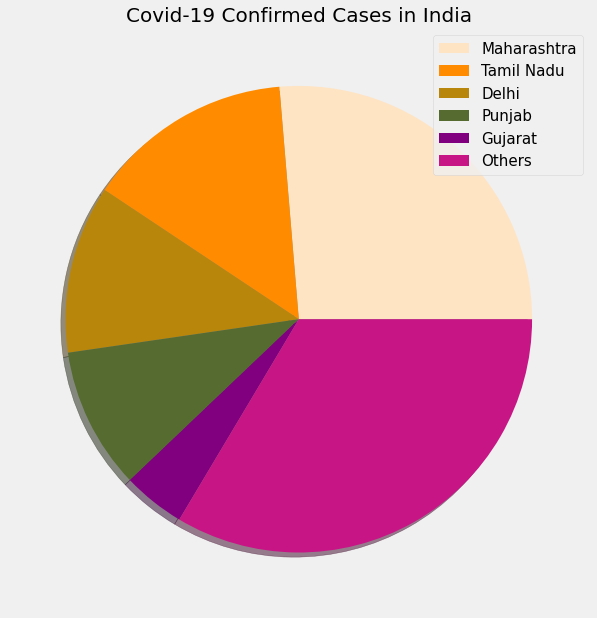

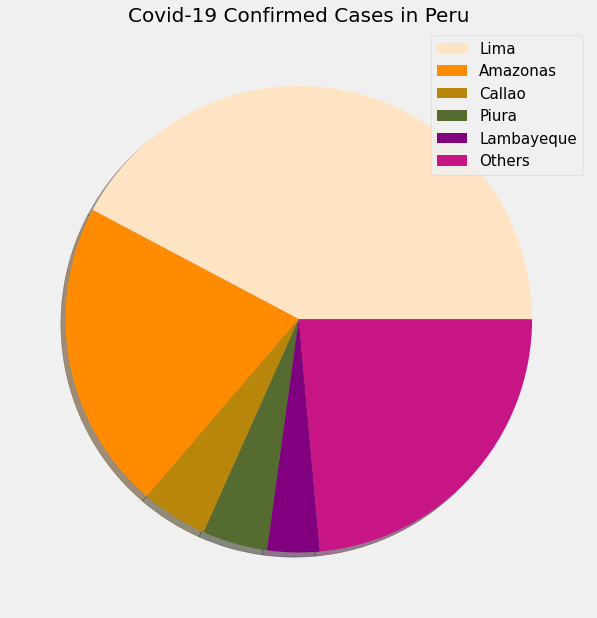

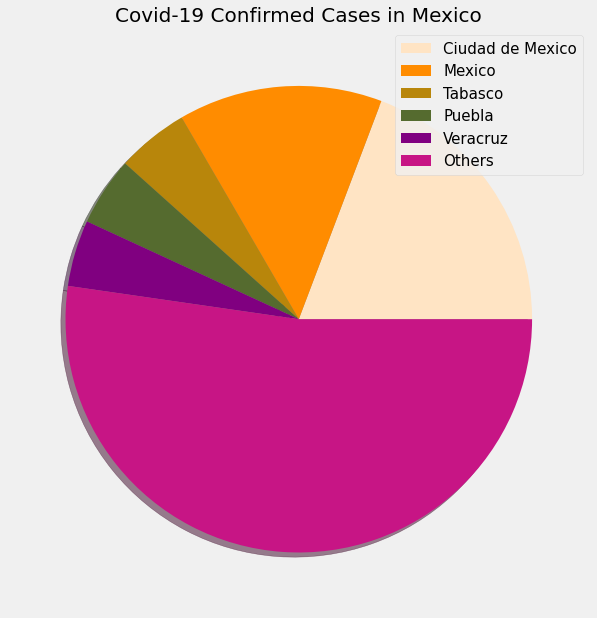

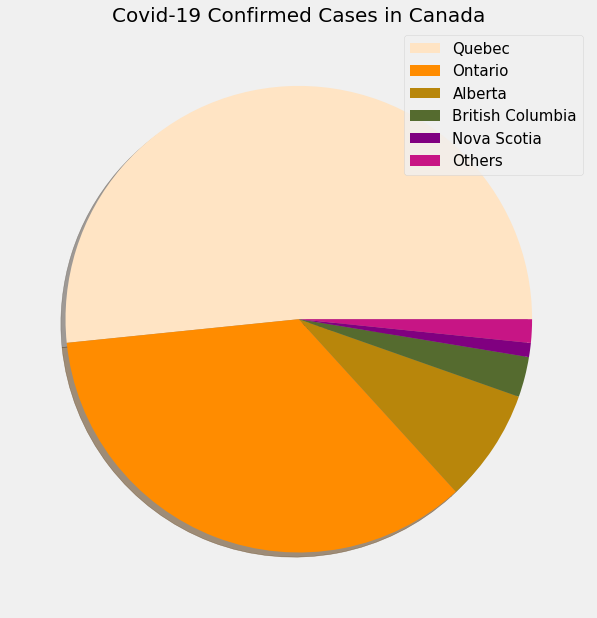

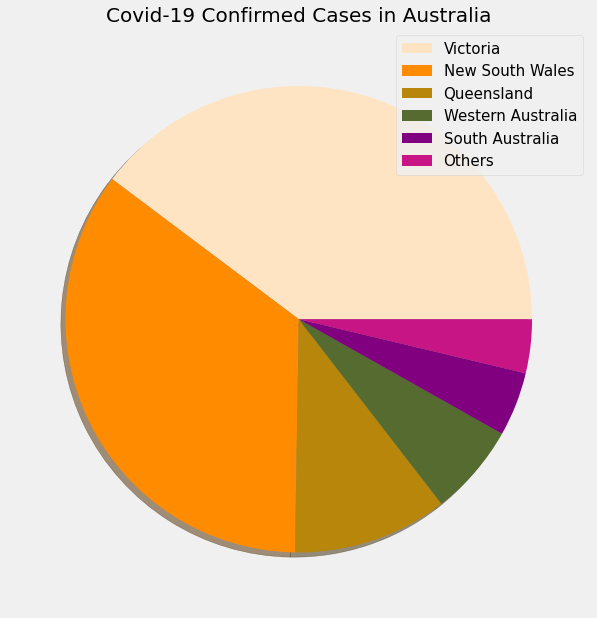

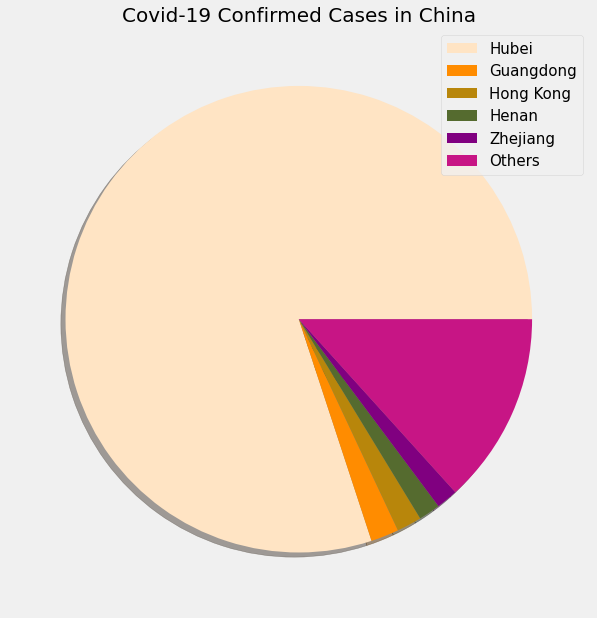

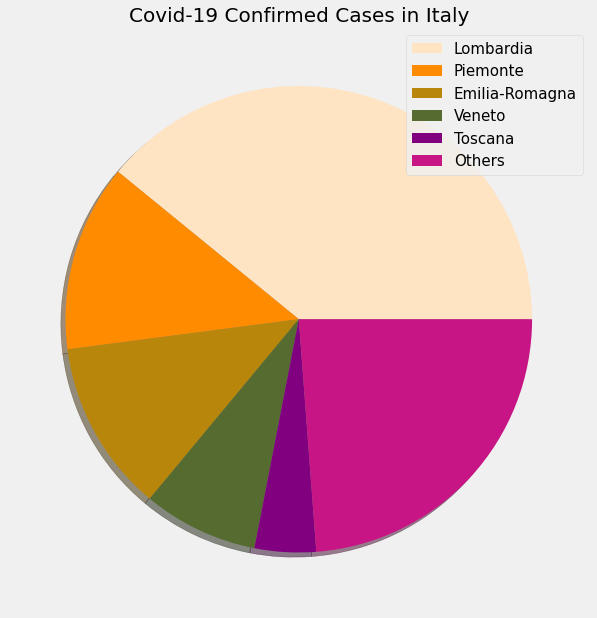

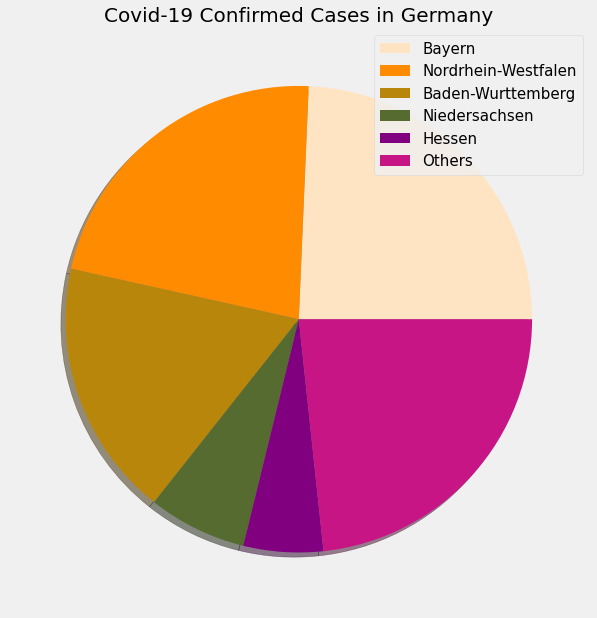

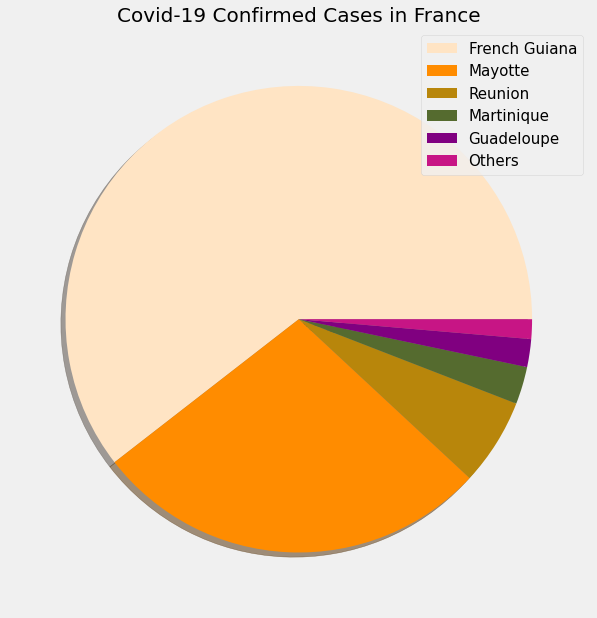

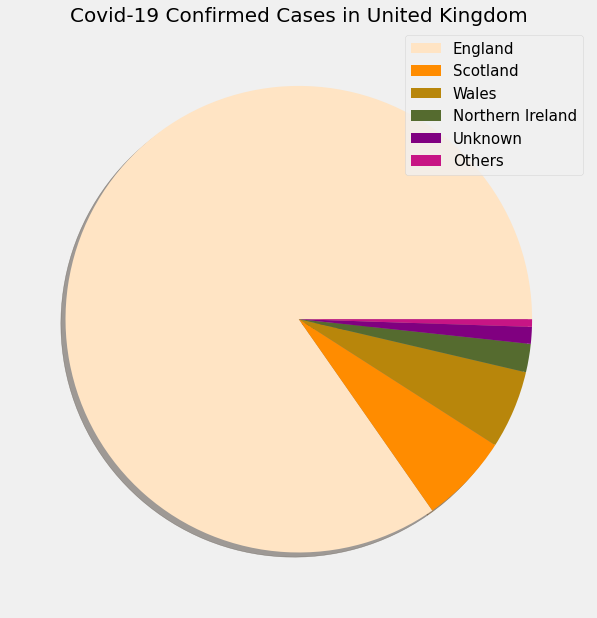

In [126]:
pie_chart_countries = ['US', 'Brazil', 'Russia', 'India', 'Peru', 'Mexico', 'Canada', 
                       'Australia', 'China', 'Italy', 'Germany', 'France', 'United Kingdom']

for i in pie_chart_countries:
    plot_pie_country_with_regions(i, 'Covid-19 Confirmed Cases in {}'.format(i))